# <center>Identification des actions de valeur et des actions de croissance grâce au Machine Learning</center>

<h2>Introduction</h2>

Dans leurs métiers de gestion de portefeuille, l’identification et la sélection des titres financiers conformément à la stratégie d’investissement du fonds et au profil des clients font partir des problématiques auxquelles les professionnels de la gestion d’actifs sont confrontés. Dans le cas des actions, il existe une pléthore de typologie parmi lesquelles la littérature financière a retenu deux principales classes : les actions de croissance et les actions de valeur.

Cette classification entre les actions de croissance et les actions de valeur est à la base des deux principales théories en stratégie d’investissement boursier : Growth investing (l’investissement dans les actions en croissance) et Value investing (l’investissement dans les actions de valeur). 

Une action de valeur provient d’une entreprise mature avec des caractéristiques de sous-évaluation entre sa cotation boursière et sa valorisation réelle. La stratégie d’investissement dans les actions de valeur consiste alors à acheter des actions à un prix inférieur à leur valeur intrinsèque. Résultant des cours de finance du professeur Benjamin Graham (1928)  à la Columbia Business School, cette stratégie a été plusieurs fois amandée et plus particulièrement par les contributions d’un de ses élèves et célèbre investisseur Warren Buffet.

Quant aux actions en croissance, elles sont issues de sociétés en expansion avec de fortes perspective de croissances (en apparence). L’investissement dans les actions en croissance sera ainsi orientée vers l’achat des titres financiers d’entreprises dont le compte de résultat affiche des signes de croissance supérieure à la moyenne. Cela même si le cours de l’action semble cher en matière de ratios de Price-to-book ou de Price-to-earning. Née des travaux de définition et de promotion de Thomas Rowe Price, Jr en 1937, elle a été fortement influencé par les travaux de Fisher (1958).


L’avènement des techniques de machine learning et leur application à la finance nous amène à répondre à la question suivante : Les méthodes de classification permettent-ils d’identifier efficacement les actions de valeur et les actions de croissance sur le marché ? Pour répondre à cette problématique, nous développerons un outil d’aide à la décision grâce aux algorithmes de classification permettant de distinguer ces deux types d’actions dans la liste pléthorique de titres cotés sur un marché financier (la bourse de Paris dans notre cas). Tout en se basant sur les critères de chaque théorie d’investissement, notre outil permettra d’épargner plusieurs heures (voir des jours) d’analyse aux investisseurs et améliorera par conséquent le mécanisme de détection d’opportunités.

<h2>Importation des librairies</h2>

In [1]:
import pandas as pd                                 # Chargement des librairies necéssaire pour l'étude
import numpy as np

from sklearn import cluster, metrics, preprocessing 
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plotly.express as px                                        ### DataViz
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 1. Importation et fusion des bases de données

<h3>1.1. Importation des données du cac 40</h3>

In [2]:
# 1.1.1. Importation de la base de données et visualisation des cinq premières observations
cac_40 = pd.read_csv("cac_40.csv")
del cac_40["Unnamed: 0"]            # Suppression de la première colonne.
cac_40.head()

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Accor SA (ACCP),ACCP,18.04,2.12,-,1.37,-,-,-,27.53,7.57B,18.43,1.06,1.49,1.05,270.932.350,Hôtels et motels,196020,6.03B,cac 40
1,Air Liquide SA (AIRP),AIRP,38.82,3.14,73.15,3.63,1.91%,7.91%,51.48%,120.05,55.21B,25.38,0.79,4.73,2.70,473.105.514,Fabrication de produits chimiques,67200,32.77B,cac 40
2,ArcelorMittal S.A. (MT),MT,29.92,0.25,6.83,0.37,-,-,-,9.54,9.44B,33.94,2.07,- 2.23,0.26,1.012.079.421,Fer et acier,191000,1.55B,cac 40
3,Atos SE (ATOS),ATOS,65.55,0.69,8.94,1.10,-,-4.35%,27.11%,61.20,6.57B,15.97,0.92,3.83,1.40,108.632.710,Services informatiques,99906,17B,cac 40
4,AXA SA (AXAF),AXAF,29.40,0.37,9.88,0.58,4.26%,-14.31%,124.8%,15.37,36.15B,10.11,1.36,1.52,1.43,2.386.592.828,Assurance (vie),99843,184.29B,cac 40


In [3]:
# 1.1.2. Dimension de la base de données
cac_40.shape

(40, 20)

On a 40 observations et 20 variables dans la base de données cac_40.

In [4]:
# 1.1.3. Description des colonnes de la base
cac_40.columns

Index(['firme', 'stock', 'book_to_market', 'price_to_sales',
       'price_to_cash_flow', 'price_to_book', 'dividend_yield', 'g',
       'payout_ratio', 'price', 'market_cap', 'price_to_earnings', 'beta',
       'earnings_per_share', 'dividend', 'shares_outstanding', 'sector',
       'employees', 'revenue', 'indices'],
      dtype='object')

<h3>1.2. Importation des données du cac next 20</h3>

In [3]:
# 1.2.1. Importation de la base de données et visualisation des cinq premières observations
cac_next20 = pd.read_csv("cac_next20.csv")
del cac_next20["Unnamed: 0"]
cac_next20.head()

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Alstom SA (ALSO),ALSO,14.48,1.26,-,3.14,-,-,0%,45.47,10.26B,22.94,0.63,1.98,NaN,225.973.782,Sociétés ferroviaires,37575,8.2B,cac next 20
1,Arkema SA (AKE),AKE,72.59,0.90,16.47,1.33,2.28%,2.38%,47.26%,97.84,7.36B,18.34,1.38,5.25,2.20,76.358.572,Fabrication de produits chimiques,20500,8.26B,cac next 20
2,Bureau Veritas SA (BVI),BVI,2.50,1.87,15.19,7.99,-,0.6%,155.61%,20.24,8.98B,55.50,1.01,0.36,0.56,448.923.687,Services aux entreprises,78395,7.3B,cac next 20
3,Edenred SA (EDEN),EDEN,-5.28,6.70,36.99,-,1.67%,4.13%,100%,42.43,10.32B,38.25,0.74,1.1,0.70,245.817.083,Publicité,8861,2.32B,cac next 20
4,Electricité de France SA (EDF),EDF,14.48,0.39,-,0.6,1.73%,-17.78%,62.89%,8.79,26.85B,16.19,0.78,0.54,0.33,3.098.738.148,Fournisseurs d'électricité,161522,106.03B,cac next 20


In [6]:
# 1.2.2 Dimension de la base cac_next20
cac_next20.shape

(20, 20)

Parfait, nous avons la dimension souhaitée pour cette base de données.

In [7]:
# 1.2.3. Description des colonnes de la base
cac_next20.columns

Index(['firme', 'stock', 'book_to_market', 'price_to_sales',
       'price_to_cash_flow', 'price_to_book', 'dividend_yield', 'g',
       'payout_ratio', 'price', 'market_cap', 'price_to_earnings', 'beta',
       'earnings_per_share', 'dividend', 'shares_outstanding', 'sector',
       'employees', 'revenue', 'indices'],
      dtype='object')

<h3>1.3. Importation des données du cac mid 60</h3>

In [4]:
# 1.3.1. Importation de la base de données et visualisation des cinq premières observations
cac_mid60 = pd.read_csv("cac_mid60.csv", decimal=",")
del cac_mid60["Unnamed: 0"]
cac_mid60.head()

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Aeroports de Paris SA (ADP),ADP,44.06,2.31,-,1.95,0.82%,-35.76%,-,89.5,8.49B,20.55,1.14,- 2.33,0.70,98.944.352,Transports (divers),26122,5.87B,cac mid 60
1,Air France - KLM SA (AIRF),AIRF,-5.99,0.08,3,-,-,-,-,3.73,1.56B,4.29,0.99,- 9.17,NaN,427.432.464,Compagnies aériennes,83896,20.35B,cac mid 60
2,Akka Technologies (AKA),AKA,21.87,0.24,3.21,0.75,3.86%,-,19.2%,16.56,360.25M,5.04,2.06,3.27,0.64,21.833.313,Logiciels et programmation,20930,1.51B,cac mid 60
3,Albioma SA (ABIO),ABIO,13.24,2.79,134.25,3.44,1.54%,7.09%,43.03%,43.8,1.41B,29.13,0.63,1.56,0.70,30.893.808,Fournisseurs d'électricité,579,756.39M,cac mid 60
4,ALD SA (ALDA),ALDA,9.63,0.37,-,0.93,7.03%,-,53.01%,9.32,3.61B,7.54,NaN,1.19,0.63,403.000.753,Location et leasing,6708,14.49B,cac mid 60


In [9]:
# 1.3.2 Dimension de la base cac_mid60
cac_mid60.shape

(60, 20)

Parfait, là aussi nous avons 60 observations et 20 variables.

In [10]:
# 1.3.3. Description des colonnes de la base
cac_mid60.columns

Index(['firme', 'stock', 'book_to_market', 'price_to_sales',
       'price_to_cash_flow', 'price_to_book', 'dividend_yield', 'g',
       'payout_ratio', 'price', 'market_cap', 'price_to_earnings', 'beta',
       'earnings_per_share', 'dividend', 'shares_outstanding', 'sector',
       'employees', 'revenue', 'indices'],
      dtype='object')

Toutes les trois bases de données ont la même structure des données, il est maintenant possible pour nous de passer à la concaténation des trois bases de données en une seule.

<h2>1.4. Création de la base sbf120</h2>

In [5]:
# 1.4.1. Préparation de la concaténation
sbf_120_0 = [cac_40, cac_next20, cac_mid60]

In [6]:
# 1.4.2. Concaténation
sbf_120_base = pd.concat(sbf_120_0)

In [7]:
# Affichage de la dimension de la nouvelle base
sbf_120_base.shape

(120, 20)

Parfait, on a 120 actions (en observations) et 20 variables.

In [9]:
# Affichage de la base de données
pd.set_option("display.max_rows",120)
sbf_120_base

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Accor SA (ACCP),ACCP,18.040000,2.12,-,1.370000,-,-,-,27.530000,7.57B,18.430000,1.060000,1.49,1.050000,270.932.350,Hôtels et motels,196020,6.03B,cac 40
1,Air Liquide SA (AIRP),AIRP,38.820000,3.14,73.15,3.630000,1.91%,7.91%,51.48%,120.050000,55.21B,25.380000,0.790000,4.73,2.700000,473.105.514,Fabrication de produits chimiques,67200,32.77B,cac 40
2,ArcelorMittal S.A. (MT),MT,29.920000,0.25,6.83,0.370000,-,-,-,9.540000,9.44B,33.940000,2.070000,- 2.23,0.260000,1.012.079.421,Fer et acier,191000,1.55B,cac 40
3,Atos SE (ATOS),ATOS,65.550000,0.69,8.94,1.100000,-,-4.35%,27.11%,61.200000,6.57B,15.970000,0.920000,3.83,1.400000,108.632.710,Services informatiques,99906,17B,cac 40
4,AXA SA (AXAF),AXAF,29.400000,0.37,9.88,0.580000,4.26%,-14.31%,124.8%,15.370000,36.15B,10.110000,1.360000,1.52,1.430000,2.386.592.828,Assurance (vie),99843,184.29B,cac 40
5,BNP Paribas SA (BNPP),BNPP,89.340000,-,-,0.400000,-,-,0%,26.750000,33.06B,4.310000,1.630000,6.21,3.100000,1.248.591.040,Banques (money center),198816,69.57B,cac 40
6,Bouygues SA (BOUY),BOUY,26.450000,0.34,13.49,1.190000,5.39%,2.04%,47.69%,28.530000,11.03B,9.000000,0.870000,3.17,1.700000,379.828.120,Services de construction,133197,37.93B,cac 40
7,Capgemini SE (CAPP),CAPP,35.010000,1.38,15.68,3.410000,1.13%,-4.5%,36.07%,75.380000,12.82B,15.060000,1.100000,5,1.900000,169.028.781,Logiciels et programmation,219314,20.86B,cac 40
8,Carrefour SA (CARR),CARR,11.490000,0.16,8.15,1.230000,1.63%,-31%,43.38%,14.660000,11.7B,550.110000,0.690000,0.03,0.460000,797.807.965,Détaillants (épicerie),321383,112.25B,cac 40
9,Crédit Agricole SA (CAGR),CAGR,22.160000,-,4.14,0.380000,-,-,0%,6.700000,19.18B,4.490000,1.690000,1.49,0.700000,2.884.253.712,Banques régionales,73037,61.36B,cac 40


Nous allons à présent passé à la prise de connaissance des types des différentes variables de notre base. 
Pour cela, nous allons utiliser la fonction df.dtypes de pandas

In [15]:
sbf_120_base.dtypes

firme                 object
stock                 object
book_to_market        object
price_to_sales        object
price_to_cash_flow    object
price_to_book         object
dividend_yield        object
g                     object
payout_ratio          object
price                 object
market_cap            object
price_to_earnings     object
beta                  object
earnings_per_share    object
dividend              object
shares_outstanding    object
sector                object
employees              int64
revenue               object
indices               object
dtype: object

Nous allons exporter cette première base avant de procéder à la phase de Data Wrangling.

<h2>1.5. Exportation de sbf120_base</h2>

In [11]:
sbf_120_base.to_csv("sbf_120_base.csv")

L'enregistrement de cette première base de données, permet de garder les données à l'état brute après la fusion des trois bases de données avant le passage au nettoyage des données.

In [12]:
# Importation de la base de données et visualisation des données pour s'assurer que la nouvelle indexation a bien
# été prise en compte
sbf_120_base = pd.read_csv("sbf_120_base.csv")
del sbf_120_base["Unnamed: 0"]
sbf_120_base

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Accor SA (ACCP),ACCP,18.04,2.12,-,1.37,-,-,-,27.530,7.57B,18.43,1.06,1.49,1.05,270.932.350,Hôtels et motels,196020,6.03B,cac 40
1,Air Liquide SA (AIRP),AIRP,38.82,3.14,73.15,3.63,1.91%,7.91%,51.48%,120.050,55.21B,25.38,0.79,4.73,2.70,473.105.514,Fabrication de produits chimiques,67200,32.77B,cac 40
2,ArcelorMittal S.A. (MT),MT,29.92,0.25,6.83,0.37,-,-,-,9.540,9.44B,33.94,2.07,- 2.23,0.26,1.012.079.421,Fer et acier,191000,1.55B,cac 40
3,Atos SE (ATOS),ATOS,65.55,0.69,8.94,1.1,-,-4.35%,27.11%,61.200,6.57B,15.97,0.92,3.83,1.40,108.632.710,Services informatiques,99906,17B,cac 40
4,AXA SA (AXAF),AXAF,29.4,0.37,9.88,0.58,4.26%,-14.31%,124.8%,15.370,36.15B,10.11,1.36,1.52,1.43,2.386.592.828,Assurance (vie),99843,184.29B,cac 40
5,BNP Paribas SA (BNPP),BNPP,89.34,-,-,0.4,-,-,0%,26.750,33.06B,4.31,1.63,6.21,3.10,1.248.591.040,Banques (money center),198816,69.57B,cac 40
6,Bouygues SA (BOUY),BOUY,26.45,0.34,13.49,1.19,5.39%,2.04%,47.69%,28.530,11.03B,9.00,0.87,3.17,1.70,379.828.120,Services de construction,133197,37.93B,cac 40
7,Capgemini SE (CAPP),CAPP,35.01,1.38,15.68,3.41,1.13%,-4.5%,36.07%,75.380,12.82B,15.06,1.1,5,1.90,169.028.781,Logiciels et programmation,219314,20.86B,cac 40
8,Carrefour SA (CARR),CARR,11.49,0.16,8.15,1.23,1.63%,-31%,43.38%,14.660,11.7B,550.11,0.69,0.03,0.46,797.807.965,Détaillants (épicerie),321383,112.25B,cac 40
9,Crédit Agricole SA (CAGR),CAGR,22.16,-,4.14,0.38,-,-,0%,6.700,19.18B,4.49,1.69,1.49,0.70,2.884.253.712,Banques régionales,73037,61.36B,cac 40


In [19]:
tele = pd.read_csv("teleperformance_page.csv")
tele

,firme,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Teleperformance SE (TEPRF),256,15.24B,47.4,0.67,5.4,2.4,58727599,Business Services,331065,5.45B,c


In [20]:
tele["stock"] = "TEPRF"
tele

,firme,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices,stock
0,Teleperformance SE (TEPRF),256,15.24B,47.4,0.67,5.4,2.4,58727599,Business Services,331065,5.45B,c,TEPRF


In [21]:
divtl = tele[["stock","firme","dividend"]]
divtl

,stock,firme,dividend
0,TEPRF,Teleperformance SE (TEPRF),2.4


In [17]:
dividend = sbf_120_base[["stock","firme","dividend"]]
dividend.set_index("stock")
dividend

,stock,firme,dividend
0,ACCP,Accor SA (ACCP),1.05
1,AIRP,Air Liquide SA (AIRP),2.70
2,MT,ArcelorMittal S.A. (MT),0.26
3,ATOS,Atos SE (ATOS),1.40
4,AXAF,AXA SA (AXAF),1.43
5,BNPP,BNP Paribas SA (BNPP),3.10
6,BOUY,Bouygues SA (BOUY),1.70
7,CAPP,Capgemini SE (CAPP),1.90
8,CARR,Carrefour SA (CARR),0.46
9,CAGR,Crédit Agricole SA (CAGR),0.70


In [26]:
dividend.drop(index=[31],inplace=True)
dividend.shape

C:\Users\X230\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(119, 3)

In [29]:
div = [divtl,dividend]
sbf_div = pd.concat(div)
sbf_div.shape

(120, 3)

In [30]:
sbf_div.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stock     120 non-null    object 
 1   firme     120 non-null    object 
 2   dividend  101 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.8+ KB


In [34]:
sbf_div = sbf_div.rename(columns={"stock":"Tick", "firme":"Stock", "dividend":"Div"})
sbf_div.set_index("Tick", inplace=True)
sbf_div.shape

(120, 2)

In [38]:
sbf_div.head(2)

,Stock,Div
Tick,,
TEPRF,Teleperformance SE (TEPRF),2.40
ACCP,Accor SA (ACCP),1.05


In [42]:
misdiv = sbf_div[sbf_div.isnull().any(axis=1)]
print("le nombre de valeurs manquantes est:",misdiv.shape[0])
misdiv

le nombre de valeurs manquantes est: 19


,Stock,Div
Tick,,
WLN,Worldline SA (WLN),NaN
ALSO,Alstom SA (ALSO),NaN
ORP,Orpea SA (ORP),NaN
UBIP,Ubisoft Entertainment SA (UBIP),NaN
AIRF,Air France - KLM SA (AIRF),NaN
LTEN,Alten SA (LTEN),NaN
GEPH,CGG SA (GEPH),NaN
DBV,DBV Technologies SA (DBV),NaN
ELIS,Elis Services SA (ELIS),NaN


In [43]:
sbf_div.loc[["LTEN"],["Div"]] = 0.74                  # source : www.investing.com & www.boursorama.com
sbf_div.loc[["ORP"],["Div"]] = 1.2
sbf_div.loc[["ALSO"],["Div"]] = 0.35
sbf_div.loc[["WLN"],["Div"]] = 0.0
sbf_div.loc[["UBIP"],["Div"]] = 0.0
sbf_div.loc[["AIRF"],["Div"]] = 0.0
sbf_div.loc[["GEPH"],["Div"]] = 0.0
sbf_div.loc[["DBV"],["Div"]] = 0.0
sbf_div.loc[["ELIS"],["Div"]] = 0.0
sbf_div.loc[["ERMT"],["Div"]] = 0.0
sbf_div.loc[["GNFT"],["Div"]] = 0.0
sbf_div.loc[["KORI"],["Div"]] = 0.6
sbf_div.loc[["MDM"],["Div"]] = 0.0
sbf_div.loc[["CNAT"],["Div"]] = 0.03
sbf_div.loc[["NEOEN"],["Div"]] = 0.0
sbf_div.loc[["SOIT"],["Div"]] = 0.0
sbf_div.loc[["TKTT"],["Div"]] = 0.0
sbf_div.loc[["VLLP"],["Div"]] = 0.0
sbf_div.loc[["VIRB"],["Div"]] = 0.0

In [44]:
sbf_div.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, TEPRF to MWDP
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stock   120 non-null    object 
 1   Div     120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [46]:
sbf_div.to_csv("sbf_div.csv")

<h2>1.6. Gestion des données manquantes des ratios financiers de sbf120_base</h2>

Comme pour les données manquantes du <b>Price to Earnings</b>, nous remplacerons le taux de croissance des dividendes (g), book-to-market, price to earnings, price to cash-flow, dividend yield et le price-to-sales par celles du secteur d'activité dans lequel elles évoluent.

In [19]:
# Affichage des principaux ratios de notre base 

sbf_120_base[["firme","g","price_to_cash_flow","dividend_yield","price_to_sales"]]

,firme,g,price_to_cash_flow,dividend_yield,price_to_sales
0,Accor SA (ACCP),-,-,-,2.12
1,Air Liquide SA (AIRP),7.91%,73.15,1.91%,3.14
2,ArcelorMittal S.A. (MT),-,6.83,-,0.25
3,Atos SE (ATOS),-4.35%,8.94,-,0.69
4,AXA SA (AXAF),-14.31%,9.88,4.26%,0.37
5,BNP Paribas SA (BNPP),-,-,-,-
6,Bouygues SA (BOUY),2.04%,13.49,5.39%,0.34
7,Capgemini SE (CAPP),-4.5%,15.68,1.13%,1.38
8,Carrefour SA (CARR),-31%,8.15,1.63%,0.16
9,Crédit Agricole SA (CAGR),-,4.14,-,-


In [20]:
# Remplacer les modalités des ratios manquants par celles de leur secteur d'activité
sbf_120_base.loc[[81],["book_to_market"]] = 2.04  # ETL n'existe pas, nous le remplaçons donc par celui de son secteur
sbf_120_base.loc[[0],["g"]] = "9.40%"
sbf_120_base.loc[[0],["price_to_cash_flow"]] = 24.49
sbf_120_base.loc[[0],["dividend_yield"]] = "2.64%"
sbf_120_base.loc[[2],["g"]] = "2.32%"
sbf_120_base.loc[[3],["dividend_yield"]] = "1.36%"
sbf_120_base.loc[[5],["g"]] = "15.44%"
sbf_120_base.loc[[5],["price_to_cash_flow"]] = 3.19
sbf_120_base.loc[[5],["dividend_yield"]] = "4.86%"
sbf_120_base.loc[[5],["price_to_sales"]] = 1.01
sbf_120_base.loc[[9],["g"]] = "49.97%"
sbf_120_base.loc[[9],["dividend_yield"]] ="5.93%"
sbf_120_base.loc[[9],["price_to_sales"]] = 0.40
sbf_120_base.loc[[12],["g"]] = "19.87%" 
sbf_120_base.loc[[12],["dividend_yield"]] = "2.09%"
sbf_120_base.loc[[13],["dividend_yield"]] = "0.87%"
sbf_120_base.loc[[14],["price_to_cash_flow"]] = 191.66
sbf_120_base.loc[[15],["g"]] = "-9.06%"
sbf_120_base.loc[[15],["price_to_cash_flow"]] = 39.40 
sbf_120_base.loc[[15],["dividend_yield"]] = "8.04%"
sbf_120_base.loc[[22],["g"]] = "9.61%"
sbf_120_base.loc[[22],["price_to_cash_flow"]] = 102.60
sbf_120_base.loc[[22],["price_to_sales"]] = 4.2
sbf_120_base.loc[[23],["g"]] = "10.52%"
sbf_120_base.loc[[23],["dividend_yield"]] = "2.83%"
sbf_120_base.loc[[25],["price_to_cash_flow"]] = 8.93 
sbf_120_base.loc[[25],["dividend_yield"]] = "2.83%"
sbf_120_base.loc[[25],["g"]] = "10.52%"
sbf_120_base.loc[[26],["g"]] = "19.87%"
sbf_120_base.loc[[26],["dividend_yield"]] = "2.09%"
sbf_120_base.loc[[27],["dividend_yield"]] = "3.06%"
sbf_120_base.loc[[30],["g"]] = "49.97%"
sbf_120_base.loc[[30],["dividend_yield"]] = "5.93%"
sbf_120_base.loc[[30],["price_to_sales"]] = 0.40
sbf_120_base.loc[[39],["g"]] = "0%"
sbf_120_base.loc[[39],["dividend_yield"]] ="5.22%"
sbf_120_base.loc[[40],["g"]] = "22.19%"
sbf_120_base.loc[[40],["price_to_cash_flow"]] = 25.55
sbf_120_base.loc[[40],["dividend_yield"]] = "1.92%"
sbf_120_base.loc[[42],["dividend_yield"]] = "2.36%"
sbf_120_base.loc[[44],["price_to_cash_flow"]] = 39.40
sbf_120_base.loc[[45],["g"]] = "1.96%"
sbf_120_base.loc[[45],["dividend_yield"]] = "3.41%"
sbf_120_base.loc[[47],["dividend_yield"]] = "1.87%"
sbf_120_base.loc[[48],["g"]] = "23.71%"
sbf_120_base.loc[[49],["price_to_cash_flow"]] = 107.46
sbf_120_base.loc[[50],["dividend_yield"]] ="1.92%"
sbf_120_base.loc[[51],["g"]] = "22.92%"
sbf_120_base.loc[[51],["dividend_yield"]] ="1.19%"
sbf_120_base.loc[[53],["g"]] = "13.49%"
sbf_120_base.loc[[53],["dividend_yield"]] ="1.41%"
sbf_120_base.loc[[54],["g"]] = "3.18%"
sbf_120_base.loc[[54],["dividend_yield"]] ="5.25%"
sbf_120_base.loc[[58],["g"]] = "8.09%"
sbf_120_base.loc[[58],["dividend_yield"]] ="1.15%"
sbf_120_base.loc[[60],["price_to_cash_flow"]] = 46.43 # PAS D'INFORMATION SECTORIELLE POUR AIR FRANCE KLM
sbf_120_base.loc[[62],["g"]] = "8.09%"
sbf_120_base.loc[[64],["g"]] = "1.46%"
sbf_120_base.loc[[64],["price_to_cash_flow"]] = 351.68
sbf_120_base.loc[[65],["g"]] = "13.53%"
sbf_120_base.loc[[65],["dividend_yield"]] ="1.36%"
sbf_120_base.loc[[66],["dividend_yield"]] ="4.46%"
sbf_120_base.loc[[70],["g"]] = "4.93%"
sbf_120_base.loc[[70],["price_to_cash_flow"]] = 256.03
sbf_120_base.loc[[71],["g"]] = "20.13%"
sbf_120_base.loc[[71],["dividend_yield"]] ="8.59%"
sbf_120_base.loc[[72],["g"]] = "3.18%"
sbf_120_base.loc[[72],["dividend_yield"]] ="5.25%"
sbf_120_base.loc[[73],["dividend_yield"]] ="4.95%"
sbf_120_base.loc[[74],["price_to_cash_flow"]] = 24.38 
sbf_120_base.loc[[74],["dividend_yield"]] ="2.09%"
sbf_120_base.loc[[75],["g"]] = "2.54%"
sbf_120_base.loc[[75],["price_to_cash_flow"]] = 41.39
sbf_120_base.loc[[75],["dividend_yield"]] = "3.52%"
sbf_120_base.loc[[77],["g"]] ="7.53%" 
sbf_120_base.loc[[77],["dividend_yield"]] ="2.36%" # [78] PAS DE DONNEES SECTORIELLES POUR ERAMET SA
sbf_120_base.loc[[79],["g"]] = "25.88%"
sbf_120_base.loc[[79],["dividend_yield"]] = "2.22%"
sbf_120_base.loc[[83],["g"]] = "2.54%"
sbf_120_base.loc[[83],["price_to_cash_flow"]] = 41.39
sbf_120_base.loc[[83],["dividend_yield"]] ="3.52%"
sbf_120_base.loc[[84],["g"]] = "-14.50%"
sbf_120_base.loc[[84],["dividend_yield"]] ="1.68%"
sbf_120_base.loc[[85],["price_to_cash_flow"]] = 27.77
sbf_120_base.loc[[86],["price_to_cash_flow"]] = 107.46
sbf_120_base.loc[[87],["price_to_cash_flow"]] = 191.66
sbf_120_base.loc[[91],["dividend_yield"]] ="2.10%"
sbf_120_base.loc[[92],["g"]] ="13.49%"
sbf_120_base.loc[[92],["dividend_yield"]] ="1.41%"   # [93] PAS DE DONNEES SECTORIELLES POUR (FDJ)
sbf_120_base.loc[[94],["dividend_yield"]] = "6.11%"
sbf_120_base.loc[[95],["dividend_yield"]] = "3.39%"  # [96] PAS DE DONNEES SECTORIELLES POUR MAISON DU MONDE
sbf_120_base.loc[[98],["g"]] = "49.97%"
sbf_120_base.loc[[98],["price_to_cash_flow"]] = 1.98
sbf_120_base.loc[[98],["dividend_yield"]] ="5.93%"
sbf_120_base.loc[[98],["price_to_sales"]] = 0.40
sbf_120_base.loc[[99],["g"]] = "-9.06%"
sbf_120_base.loc[[99],["price_to_cash_flow"]] =39.40 
sbf_120_base.loc[[99],["dividend_yield"]] ="8.04%"
sbf_120_base.loc[[100],["g"]] ="11.84%"
sbf_120_base.loc[[100],["dividend_yield"]] ="2.77%"
sbf_120_base.loc[[103],["price_to_cash_flow"]] =102.6 
sbf_120_base.loc[[104],["g"]] = "1.05%"
sbf_120_base.loc[[104],["dividend_yield"]] = "3.07%"
sbf_120_base.loc[[110],["g"]] = "-15.63%"
sbf_120_base.loc[[110],["dividend_yield"]] = "5.03%"
sbf_120_base.loc[[111],["g"]] = "13.53%"
sbf_120_base.loc[[111],["dividend_yield"]] = "1.36%"
sbf_120_base.loc[[114],["dividend_yield"]] = "2.59%"   # PAS DE g SECTORIEL POUR TARKET
sbf_120_base.loc[[115],["g"]] = "-6.67%"
sbf_120_base.loc[[115],["dividend_yield"]] = "3.39%"
sbf_120_base.loc[[117],["g"]] = "20.13%"
sbf_120_base.loc[[117],["price_to_cash_flow"]] = 27.77
sbf_120_base.loc[[117],["dividend_yield"]] = "8.59%"
sbf_120_base.loc[[118],["g"]] = "2.54%"
sbf_120_base.loc[[118],["dividend_yield"]] = "3.52%"

In [21]:
# Visualisation de la table complète pour voir si les modifications ont bien été prises en compte
pd.set_option("display.max_rows",120)
pd.set_option("display.max_columns",20)
sbf_120_base

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,Accor SA (ACCP),ACCP,18.04,2.12,24.49,1.37,2.64%,9.40%,-,27.530,7.57B,18.43,1.06,1.49,1.05,270.932.350,Hôtels et motels,196020,6.03B,cac 40
1,Air Liquide SA (AIRP),AIRP,38.82,3.14,73.15,3.63,1.91%,7.91%,51.48%,120.050,55.21B,25.38,0.79,4.73,2.70,473.105.514,Fabrication de produits chimiques,67200,32.77B,cac 40
2,ArcelorMittal S.A. (MT),MT,29.92,0.25,6.83,0.37,-,2.32%,-,9.540,9.44B,33.94,2.07,- 2.23,0.26,1.012.079.421,Fer et acier,191000,1.55B,cac 40
3,Atos SE (ATOS),ATOS,65.55,0.69,8.94,1.1,1.36%,-4.35%,27.11%,61.200,6.57B,15.97,0.92,3.83,1.40,108.632.710,Services informatiques,99906,17B,cac 40
4,AXA SA (AXAF),AXAF,29.4,0.37,9.88,0.58,4.26%,-14.31%,124.8%,15.370,36.15B,10.11,1.36,1.52,1.43,2.386.592.828,Assurance (vie),99843,184.29B,cac 40
5,BNP Paribas SA (BNPP),BNPP,89.34,1.01,3.19,0.4,4.86%,15.44%,0%,26.750,33.06B,4.31,1.63,6.21,3.10,1.248.591.040,Banques (money center),198816,69.57B,cac 40
6,Bouygues SA (BOUY),BOUY,26.45,0.34,13.49,1.19,5.39%,2.04%,47.69%,28.530,11.03B,9.00,0.87,3.17,1.70,379.828.120,Services de construction,133197,37.93B,cac 40
7,Capgemini SE (CAPP),CAPP,35.01,1.38,15.68,3.41,1.13%,-4.5%,36.07%,75.380,12.82B,15.06,1.1,5,1.90,169.028.781,Logiciels et programmation,219314,20.86B,cac 40
8,Carrefour SA (CARR),CARR,11.49,0.16,8.15,1.23,1.63%,-31%,43.38%,14.660,11.7B,550.11,0.69,0.03,0.46,797.807.965,Détaillants (épicerie),321383,112.25B,cac 40
9,Crédit Agricole SA (CAGR),CAGR,22.16,0.4,4.14,0.38,5.93%,49.97%,0%,6.700,19.18B,4.49,1.69,1.49,0.70,2.884.253.712,Banques régionales,73037,61.36B,cac 40


Parfait, nous pouvons à présent passé à l'étape de Data Wrangling et générer notre base de données finales, sur laquelle portera notre étude.

# 2. Data Wrangling (l'étape de nettoyage des données)

<h2>2.1. Transformation des caractères pour une meilleure gestion</h2>

In [22]:
sbf_120_base.replace("-", np.nan, inplace = True)
# Nous avons bien convertir tous les "-" en NaN afin que numpy puisse les gérér comme données manquantes.

In [23]:
sbf_120_base["shares_outstanding"] = [x.replace(".", "") for x in sbf_120_base["shares_outstanding"]]
# Les points ont bien été supprimés dans la variable : Nombre d'actions en circulation

In [24]:
#Conversion des pourcentages
sbf_120_base['dividend_yield'] = sbf_120_base['dividend_yield'].str.rstrip('%').astype('float')/100.0
sbf_120_base['g'] = sbf_120_base['g'].str.rstrip('%').astype('float')/100.0
sbf_120_base['payout_ratio'] = sbf_120_base['payout_ratio'].str.rstrip('%').astype('float')/100.0

# Les pourcentages ont été converti avec succès.

In [25]:
# il importe également de transformer les modalités négatives de la variable EPS afin de les convertir en float
sbf_120_base["earnings_per_share"].replace(" - 2.23", "-2.23", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 1.76", "-1.76", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.54", "-0.54", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 1.38", "-1.38", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 12.93", "-12.93", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.04", "-0.04", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 19.1", "-19.1", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.71", "-0.71", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 1.08", "-1.08", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 4.45", "-4.45", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 2.33", "-2.33", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 9.17", "-9.17", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 3.96", "-3.96", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.1", "-0.1", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 3.41", "-3.41", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 29.08", "-29.08", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 6.31", "-6.31", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 1.97", "-1.97", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.6", "-0.6", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.4", "-0.4", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 2.58", "-2.58", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 1.41", "-1.41", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 2.07", "-2.07", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 1.32", "-1.32", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 0.51", "-0.51", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 64.5", "-64.5", inplace = True)
sbf_120_base["earnings_per_share"].replace(" - 6.76", "-6.76", inplace = True)
sbf_120_base[["earnings_per_share"]] = sbf_120_base[["earnings_per_share"]].astype("float")
# une modalité négative en Bêta
sbf_120_base["beta"].replace(" - 0.09", "-0.09", inplace = True)

<h3>2.2. Conversion des données en float et en int</h3>

In [26]:
# Conversion du type de données
sbf_120_base[["book_to_market"]] = sbf_120_base[["book_to_market"]].astype("float")
sbf_120_base["price_to_book"] = sbf_120_base["price_to_book"].astype("float")
sbf_120_base["price_to_sales"] = sbf_120_base["price_to_sales"].astype("float")
sbf_120_base["price_to_cash_flow"] = sbf_120_base["price_to_cash_flow"].astype("float")
sbf_120_base["beta"] = sbf_120_base["beta"].astype("float")
sbf_120_base["shares_outstanding"] = sbf_120_base["shares_outstanding"].astype("int64")

<b>A présent, vérifions la nature de nos données pour nous assurer que les modifications ont bien été prises en compte avant de passer à la gestion du reste des données manquantes pour l'ensemble de notre base de données.</b>

In [27]:
sbf_120_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   firme               120 non-null    object 
 1   stock               120 non-null    object 
 2   book_to_market      120 non-null    float64
 3   price_to_sales      120 non-null    float64
 4   price_to_cash_flow  119 non-null    float64
 5   price_to_book       117 non-null    float64
 6   dividend_yield      116 non-null    float64
 7   g                   115 non-null    float64
 8   payout_ratio        86 non-null     float64
 9   price               120 non-null    float64
 10  market_cap          120 non-null    object 
 11  price_to_earnings   120 non-null    float64
 12  beta                117 non-null    float64
 13  earnings_per_share  119 non-null    float64
 14  dividend            101 non-null    float64
 15  shares_outstanding  120 non-null    int64  
 16  sector  

Parfait, la conversion de nos données s'est très bien exécutées. Nous pouvons à présent passé à la gestion des données manquantes.

<h2>2.3. Identification et gestion des données manquantes</h2>

Cette étape de préparation de données va commencer par la recherche de données manquantes dans ma base de données.

In [28]:
donnees_manquantes = sbf_120_base.isnull()
donnees_manquantes

,firme,stock,book_to_market,price_to_sales,price_to_cash_flow,price_to_book,dividend_yield,g,payout_ratio,price,market_cap,price_to_earnings,beta,earnings_per_share,dividend,shares_outstanding,sector,employees,revenue,indices
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Cette méthode nous permet d'observer les données manquantes à travers le <b>True</b>

Nous constatons que cette méthode ne prend pas en compte les données manquantes qui ne se présente pas sous la forme NaN alors qu'il y a une modalité de notre base de données qui se présente sous la forme N/A(N/A), nous allons donc la convertir grâce à NumPy.

ça y est, la trasformation a été exécuté avec succès.

Nous allons à présent passé au <b>comptage des données manquantes par variable</b>.

In [29]:
for column in donnees_manquantes.columns.values.tolist():
    print(column)
    print (donnees_manquantes[column].value_counts())
    print("") 

firme
False    120
Name: firme, dtype: int64

stock
False    120
Name: stock, dtype: int64

book_to_market
False    120
Name: book_to_market, dtype: int64

price_to_sales
False    120
Name: price_to_sales, dtype: int64

price_to_cash_flow
False    119
True       1
Name: price_to_cash_flow, dtype: int64

price_to_book
False    117
True       3
Name: price_to_book, dtype: int64

dividend_yield
False    116
True       4
Name: dividend_yield, dtype: int64

g
False    115
True       5
Name: g, dtype: int64

payout_ratio
False    86
True     34
Name: payout_ratio, dtype: int64

price
False    120
Name: price, dtype: int64

market_cap
False    120
Name: market_cap, dtype: int64

price_to_earnings
False    120
Name: price_to_earnings, dtype: int64

beta
False    117
True       3
Name: beta, dtype: int64

earnings_per_share
False    119
True       1
Name: earnings_per_share, dtype: int64

dividend
False    101
True      19
Name: dividend, dtype: int64

shares_outstanding
False    120
Name: shar

Sur les 20 variables qui constituent notre base de données, nous constatons qu'il y a 8 variables contennant des données manquantes, dont la répartition est :
<b>
1. price_to_cash_flow     : 1 donnée manquantes
2. price_to_book          : 3 données manquantes
3. dividend_yield         : 4 données manquantes
4. g (taux de croissance) : 5 données manquantes
5. payout_ratio           : 34 données manquantes
6. beta                   : 3 données manquantes
7. earnings_per_share     : 1 donnée manquante
8. dividend               : 19 données manquantes
</b>

Pour une grosse base de donnnées, on pouvait gérer ces données manquantes en les remplaçant par la moyenne (pour les variables quantitatives), la fréquence (pour les variables qualitatives) ou tout simplement les laissés comme ça.

Tous nos données manquantes sont des données quantitatives donc pas question d'utiliser la fréquence dans notre stratégie de gesiton des données manquantes. Cépendant l'utilisation de la moyenne, nous semble très risqué dans le cadre des données financières. Nous allons donc adopter la médiane de chaque variable pour les données manquantes.

<b> Avant de poursuivre, essayons de convertir nos pourcentages en nombre décimales pour faciliter les calculs de données manquantes</b>

<h3>2.3.1. Calcul de la médiane de chaque variable manquante</h3>

In [30]:
mediane_PCF = sbf_120_base["price_to_cash_flow"].astype("float").median(axis=0)
mediane_PB = sbf_120_base["price_to_book"].astype("float").median(axis=0)
mediane_DY = sbf_120_base["dividend_yield"].astype("float").median(axis=0)
mediane_g = sbf_120_base["g"].astype("float").median(axis=0)
mediane_PR = sbf_120_base["payout_ratio"].astype("float").median(axis=0)
mediane_beta = sbf_120_base["beta"].astype("float").median(axis=0)
mediane_EPS = sbf_120_base["earnings_per_share"].astype("float").median(axis=0)
mediane_div = sbf_120_base["dividend"].astype("float").median(axis=0)
print("la médiane du price_to_cash_flow est : ", mediane_PCF)
print("la médiane du price_to_book est : ", mediane_PB)
print("la médiane du dividend_yield est : ", mediane_DY)
print("la médiane du taux de croissance g est : ", mediane_g)
print("la médiane du payout_ratio est : ", mediane_PR)
print("la médiane du Bêta est : ", mediane_beta)
print("la médiane du earnings_per_share est : ", mediane_EPS)
print("la médiane du dividend est : ", mediane_div)

la médiane du price_to_cash_flow est :  22.02
la médiane du price_to_book est :  1.51
la médiane du dividend_yield est :  0.02645
la médiane du taux de croissance g est :  0.0318
la médiane du payout_ratio est :  0.436
la médiane du Bêta est :  1.03
la médiane du earnings_per_share est :  1.54
la médiane du dividend est :  1.43


<h3>2.3.2. Remplaçons les valeurs manquantes par la médiane de chaque variable</h3>

In [31]:
sbf_120_base["price_to_cash_flow"].replace(np.nan, mediane_PCF, inplace=True)
sbf_120_base["price_to_book"].replace(np.nan, mediane_PB, inplace=True)
sbf_120_base["dividend_yield"].replace(np.nan, mediane_DY, inplace=True)
sbf_120_base["g"].replace(np.nan, mediane_g, inplace=True)
sbf_120_base["payout_ratio"].replace(np.nan, mediane_PR, inplace=True)
sbf_120_base["beta"].replace(np.nan, mediane_beta, inplace=True)
sbf_120_base["earnings_per_share"].replace(np.nan, mediane_EPS, inplace=True)
sbf_120_base["dividend"].replace(np.nan, mediane_div, inplace=True)

In [32]:
# Observons la nouvelle base de données après remplaceement des données manquantes de chaque variable par la médiane
sbf_120_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   firme               120 non-null    object 
 1   stock               120 non-null    object 
 2   book_to_market      120 non-null    float64
 3   price_to_sales      120 non-null    float64
 4   price_to_cash_flow  120 non-null    float64
 5   price_to_book       120 non-null    float64
 6   dividend_yield      120 non-null    float64
 7   g                   120 non-null    float64
 8   payout_ratio        120 non-null    float64
 9   price               120 non-null    float64
 10  market_cap          120 non-null    object 
 11  price_to_earnings   120 non-null    float64
 12  beta                120 non-null    float64
 13  earnings_per_share  120 non-null    float64
 14  dividend            120 non-null    float64
 15  shares_outstanding  120 non-null    int64  
 16  sector  

Parfait, le remplacement s'est bien exécuté.
<br> Nous n'avons plus de données manquantes dans notre base de données.

<h3> 2.4. Définition de la nouvelle structure de la base de données</h3>

Cette nouvelle structure consiste à mettre les variables actives pour notre étude en avant et laisser les variables illustratives derrières. Nous n'avions pas modifier les variables : <b>market_cap (capitalisation boursière) et revenue (chiffre d'affaires)</b> des entreprises car nous ne les utiliserons pas dans cette étude. Cépendant, comme cette base de données s'avère utile pour de futurs travaux, là nous jugerons peut-être de convertir les <b>B en milliard</b>.

<b>NB : Tous les montants sont en euro.</b>

In [33]:
sbf_120_clean=sbf_120_base[["stock","book_to_market","price_to_earnings","g","price_to_cash_flow","dividend_yield","beta",
                            "price_to_sales","price_to_book","payout_ratio","dividend","earnings_per_share","price",
                            "firme","market_cap","revenue","shares_outstanding","employees","sector","indices"]]

In [34]:
sbf_120_clean.sort_values(by="stock", inplace=True)

# Remplacer l'index de la base par le sygle des actions
sbf_120_clean.set_index("stock", inplace=True)

# Exportation de la base clean avec le sygle des actions comme index
sbf_120_clean.to_csv("sbf_120_clean.csv")

<b>Parfait, la préparation des données a été un succès, nous pouvons à présent exporter cette base de données qui nous servira pour les prochaines étapes de notre recherche.</b>
Dans cette recherche, la normalisation des données ne serait pas nécessaire. 

<h3> 2.5. Importation et visualisation de la base de données sbf_120_clean</h3>

In [35]:
sbf_120 = pd.read_csv("sbf_120_clean.csv")
sbf_120.set_index("stock", inplace=True)
sbf_120

,book_to_market,price_to_earnings,g,price_to_cash_flow,dividend_yield,beta,price_to_sales,price_to_book,payout_ratio,dividend,earnings_per_share,price,firme,market_cap,revenue,shares_outstanding,employees,sector,indices
stock,,,,,,,,,,,,,,,,,,,
ABIO,13.24,29.13,0.0709,134.25,0.01540,0.63,2.79,3.44,0.4303,0.70,1.56,43.800,Albioma SA (ABIO),1.41B,756.39M,30893808,579,Fournisseurs d'électricité,cac mid 60
ACCP,18.04,18.43,0.0940,24.49,0.02640,1.06,2.12,1.37,0.4360,1.05,1.49,27.530,Accor SA (ACCP),7.57B,6.03B,270932350,196020,Hôtels et motels,cac 40
ADP,44.06,20.55,-0.3576,46.43,0.00820,1.14,2.31,1.95,0.4360,0.70,-2.33,89.500,Aeroports de Paris SA (ADP),8.49B,5.87B,98944352,26122,Transports (divers),cac mid 60
AIR,1.69,24.75,0.1987,417.32,0.02090,1.74,0.95,41.96,0.4360,1.53,-1.76,57.040,Airbus Group SE (AIR),46.4B,70.48B,782310505,135978,Aérospatiale et défense,cac 40
AIRF,-5.99,4.29,0.0318,3.00,0.02645,0.99,0.08,1.51,0.4360,1.43,-9.17,3.730,Air France - KLM SA (AIRF),1.56B,20.35B,427432464,83896,Compagnies aériennes,cac mid 60
AIRP,38.82,25.38,0.0791,73.15,0.01910,0.79,3.14,3.63,0.5148,2.70,4.73,120.050,Air Liquide SA (AIRP),55.21B,32.77B,473105514,67200,Fabrication de produits chimiques,cac 40
AKA,21.87,5.04,0.0809,3.21,0.03860,2.06,0.24,0.75,0.1920,0.64,3.27,16.560,Akka Technologies (AKA),360.25M,1.51B,21833313,20930,Logiciels et programmation,cac mid 60
AKE,72.59,18.34,0.0238,16.47,0.02280,1.38,0.90,1.33,0.4726,2.20,5.25,97.840,Arkema SA (AKE),7.36B,8.26B,76358572,20500,Fabrication de produits chimiques,cac next 20
ALDA,9.63,7.54,0.0146,351.68,0.07030,1.03,0.37,0.93,0.5301,0.63,1.19,9.320,ALD SA (ALDA),3.61B,14.49B,403000753,6708,Location et leasing,cac mid 60


L'enrégistrement de notre base de données clean s'est déroulé avec succès et la base a été généré avec succès dans le fichier de destination. Il est à présent temps nous de passer à l'exploitation de notre base de données.

<h1>Troisième partie : Exploitation des données</h1>

<h2> 3.1. Statistiques descriptives</h2>

In [36]:
sbf_120.shape

(120, 19)

In [37]:
sbf_120.describe()

,book_to_market,price_to_earnings,g,price_to_cash_flow,dividend_yield,beta,price_to_sales,price_to_book,payout_ratio,dividend,earnings_per_share,price,shares_outstanding,employees
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000
mean,38.183833,37.431000,0.04150,54.072500,0.037118,1.093833,2.325167,2.839000,0.574607,2.010333,2.085750,73.861983,4.269183e+08,64445.041667
std,56.416977,74.521163,0.18965,89.715493,0.033277,0.473454,3.247726,4.697663,0.800654,2.752099,10.316193,121.714577,6.875604e+08,85072.833338
min,-5.990000,4.010000,-0.45710,0.550000,0.001100,-0.090000,0.060000,0.180000,0.000000,0.060000,-64.500000,0.716000,2.308095e+06,111.000000
25%,12.035000,12.700000,-0.04850,9.800000,0.016025,0.787500,0.407500,0.872500,0.266825,0.700000,0.142500,14.645000,7.382532e+07,6703.500000
50%,26.185000,18.655000,0.03180,22.020000,0.026450,1.030000,0.940000,1.510000,0.436000,1.430000,1.540000,36.005000,1.633633e+08,26033.500000
75%,46.192500,31.297500,0.09920,46.662500,0.050150,1.322500,2.812500,3.027500,0.518625,2.320000,4.202500,82.485000,4.740863e+08,100031.750000
max,514.410000,550.110000,0.97400,600.010000,0.196400,2.740000,17.270000,41.960000,7.477000,25.400000,59.050000,799.000000,3.151103e+09,470237.000000


In [38]:
sbf_120.describe(include=['object'])

,firme,market_cap,revenue,sector,indices
count,120,120,120,120,120
unique,119,115,118,61,3
top,Sodexo SA (EXHO),2B,10.01B,Biotechnologie et médicaments,cac mid 60
freq,2,2,2,7,60


<h2> 3.2. Corrélation entre les variables</h2>

In [39]:
sbf_120.corr()

,book_to_market,price_to_earnings,g,price_to_cash_flow,dividend_yield,beta,price_to_sales,price_to_book,payout_ratio,dividend,earnings_per_share,price,shares_outstanding,employees
book_to_market,1.000000,-0.104352,0.170176,-0.001978,-0.053933,-0.069203,0.024661,-0.082470,-1.194735e-01,0.862880,0.594288,0.659730,-0.154114,-4.893910e-02
price_to_earnings,-0.104352,1.000000,-0.128038,0.005293,-0.154282,0.013127,0.142448,0.078610,2.472944e-01,-0.111315,-0.046630,-0.024011,-0.032963,1.008417e-01
g,0.170176,-0.128038,1.000000,0.066188,0.021943,0.060339,-0.048850,0.016888,2.369355e-02,0.155581,0.135869,0.147625,0.068165,-8.237139e-02
price_to_cash_flow,-0.001978,0.005293,0.066188,1.000000,-0.046736,-0.190212,0.227219,0.480592,-1.158957e-02,0.036128,0.090351,0.154975,-0.062393,-8.344509e-02
dividend_yield,-0.053933,-0.154282,0.021943,-0.046736,1.000000,0.195190,-0.126406,-0.243361,2.269273e-02,0.045513,-0.188533,-0.277094,0.089551,-6.346266e-02
beta,-0.069203,0.013127,0.060339,-0.190212,0.195190,1.000000,-0.320339,-0.111585,-5.490226e-02,-0.078711,-0.359785,-0.224638,0.015455,5.683011e-03
price_to_sales,0.024661,0.142448,-0.048850,0.227219,-0.126406,-0.320339,1.000000,0.424038,3.872136e-02,0.094298,0.160301,0.341855,-0.199816,-2.909782e-01
price_to_book,-0.082470,0.078610,0.016888,0.480592,-0.243361,-0.111585,0.424038,1.000000,2.153062e-02,0.020920,0.078066,0.261378,-0.091765,-4.233208e-02
payout_ratio,-0.119473,0.247294,0.023694,-0.011590,0.022693,-0.054902,0.038721,0.021531,1.000000e+00,-0.091670,-0.054459,-0.134396,-0.002154,-6.676701e-07
dividend,0.862880,-0.111315,0.155581,0.036128,0.045513,-0.078711,0.094298,0.020920,-9.167026e-02,1.000000,0.596822,0.684479,-0.137809,-2.349956e-02


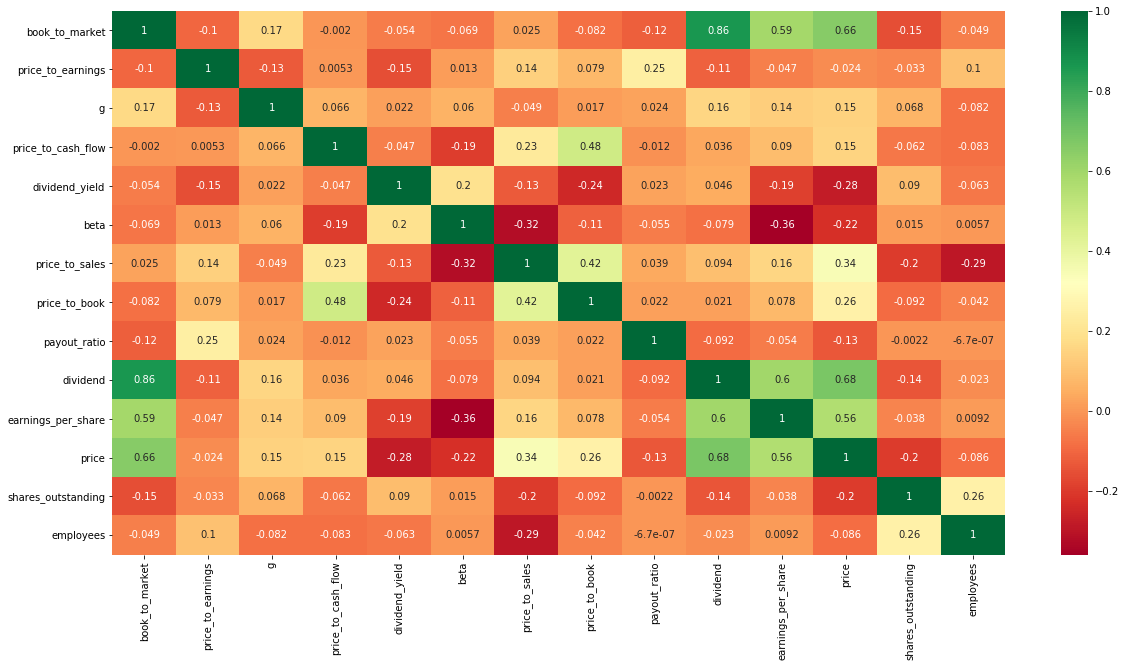

In [40]:
plt.figure(figsize=(20,10))
sbf_120_corr=sns.heatmap(sbf_120[sbf_120.corr().index].corr(),annot=True,cmap="RdYlGn")

# 4. Clustering pour l'identification des actions de valeur et de croissance

<h2>4.1. Clustering sur la base de l'ensemble des variables actives de notre base<h2>

In [41]:
sbf120 = sbf_120[["book_to_market","price_to_earnings","g","price_to_cash_flow","dividend_yield","beta",
                 "price_to_book","price_to_sales","payout_ratio"]]
sbf120.head()

,book_to_market,price_to_earnings,g,price_to_cash_flow,dividend_yield,beta,price_to_book,price_to_sales,payout_ratio
stock,,,,,,,,,
ABIO,13.24,29.13,0.0709,134.25,0.01540,0.63,3.44,2.79,0.4303
ACCP,18.04,18.43,0.0940,24.49,0.02640,1.06,1.37,2.12,0.4360
ADP,44.06,20.55,-0.3576,46.43,0.00820,1.14,1.95,2.31,0.4360
AIR,1.69,24.75,0.1987,417.32,0.02090,1.74,41.96,0.95,0.4360
AIRF,-5.99,4.29,0.0318,3.00,0.02645,0.99,1.51,0.08,0.4360


Nous avons gardé neuf variables actives sur la base de la matrice de corrélation de l'ensemble de nos variables quantitatives de base. Nous allons encore vérifier qu'il n'existe pas de dépendance entre nos variables.

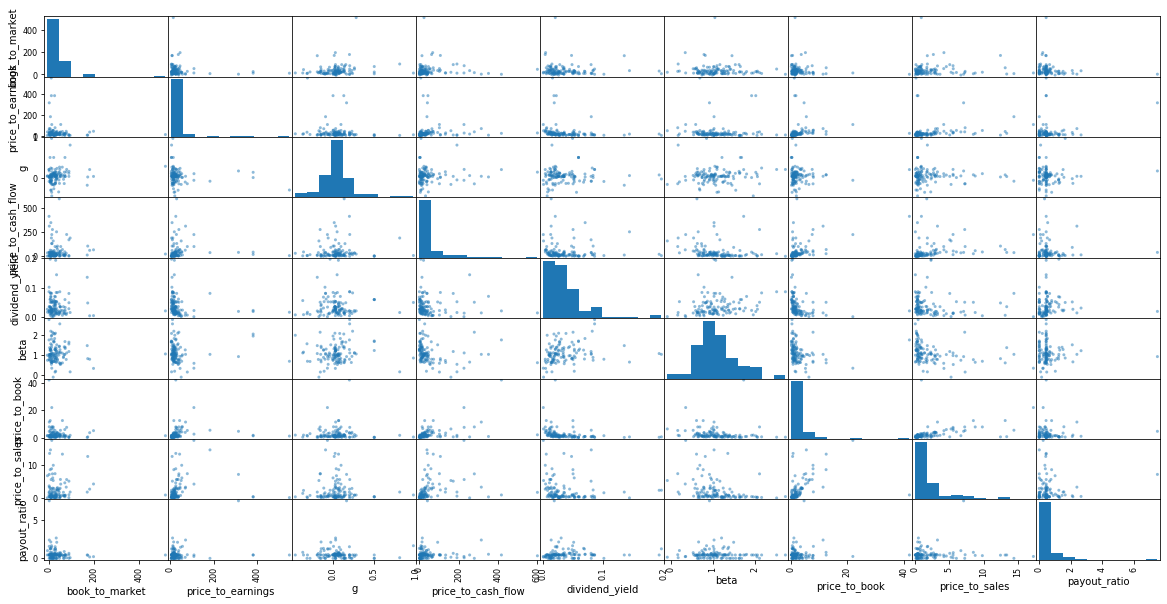

In [42]:
# graphique de croisement des variables deux à deux
scatter_matrix(sbf120,figsize=(20,10))
plt.show()

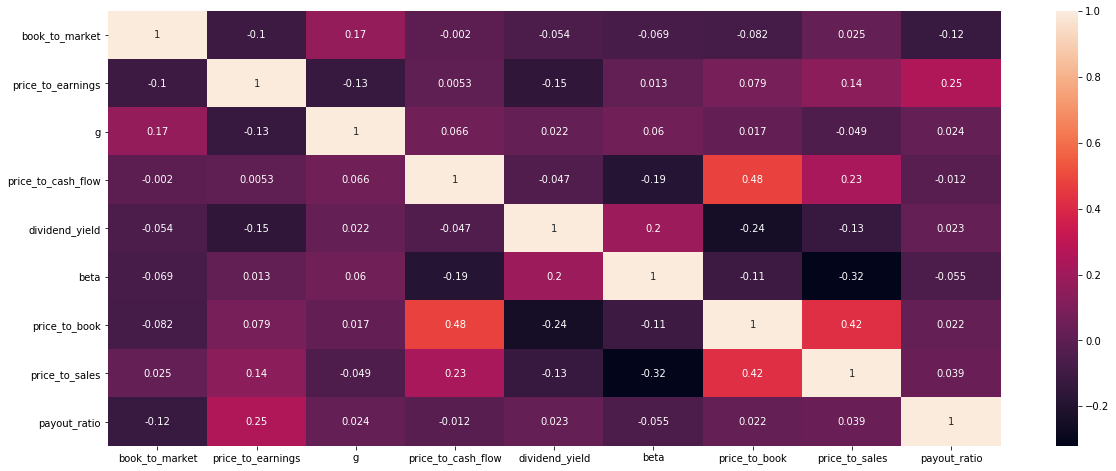

In [45]:
plt.figure(figsize=(20,8))
sns.heatmap(sbf120.corr(), annot = True)

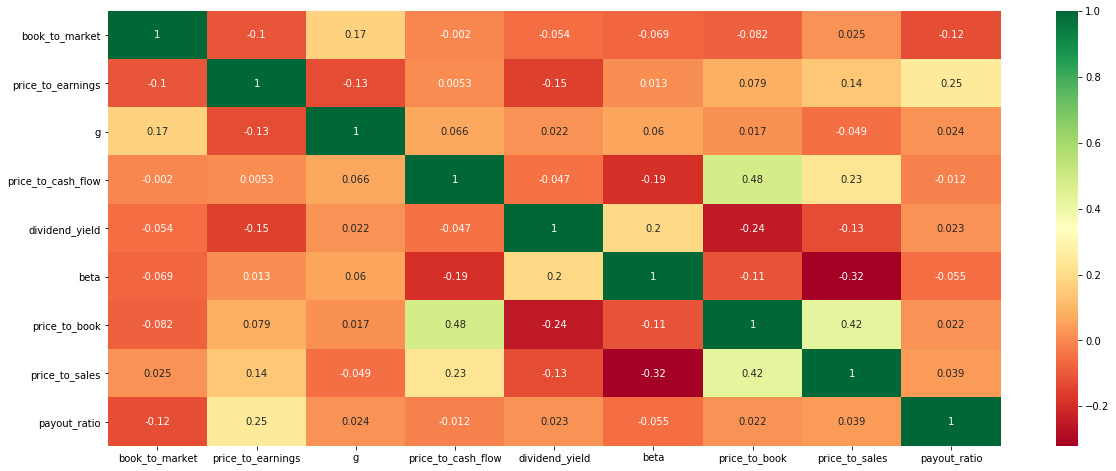

In [44]:
plt.figure(figsize=(20,8))
sbf120_corr=sns.heatmap(sbf120[sbf120.corr().index].corr(),annot=True,cmap="RdYlGn")

Nous constatons qu'aucune de nos variables ne sont liées entre elles, donc ceci est une bonne nouvelle pour la suite de nos travaux.

<h2>4.2. Centrage et réduction des données avec les variables actives</h2>

In [46]:
# Centrage et réduction des données
sbf120_cr = preprocessing.scale(sbf120)

<h2>4.3. Détermination du nombre de cluster par la méthode du coude</h2>

Avant le clustering, il serait tout à fait bien de créer une base indépendante avec les variables qu'on souhaite garder.

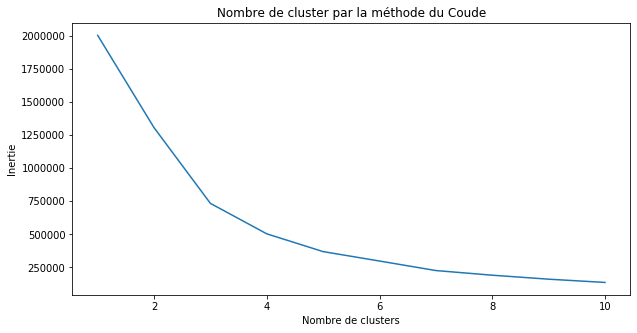

In [47]:
# Détermination du nombre de clusters sur les données originales
plt.figure(figsize=(10,5))

tab = []
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i)
    kmeans.fit(sbf120)
    tab.append(kmeans.inertia_)

plt.plot(range(1,11),tab)
plt.title("Nombre de cluster par la méthode du Coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

Tout comme en littérature financière (Berdot, Léonard et Nivoix 2006), la méthode du coude nous suggère une segmentation en trois ou quatre clusters et non seulement en deux clusters comme ceci est annoncé dans l'objectif de notre étude (value vs growth stocks).

En effet, les travaux empiriques ont montré qu'il y a quatre types d'actions ou de valeurs (pour la désignation de valeur mobilière de placement du monde francophone) sur les marchés financiers, qui sont :
<ul>
    <li>Les valeurs de rendement</li>
    <li>Les valeurs de croissance</li>
    <li>Les valeurs qui sont à la fois de rendement et de croissance</li>
    <li>Et enfin, les valeurs qui ne sont ni de rendement et ni de croissance</li>
</ul>

Ainsi, nous choisirons k=4 pour être en phase avec cette typologie de la littérature financière.

# 4.2. Classification Ascendante hiérarchique

In [48]:
# Génération de la matrice des liens
z = linkage(sbf120_cr,method='ward',metric='euclidean')

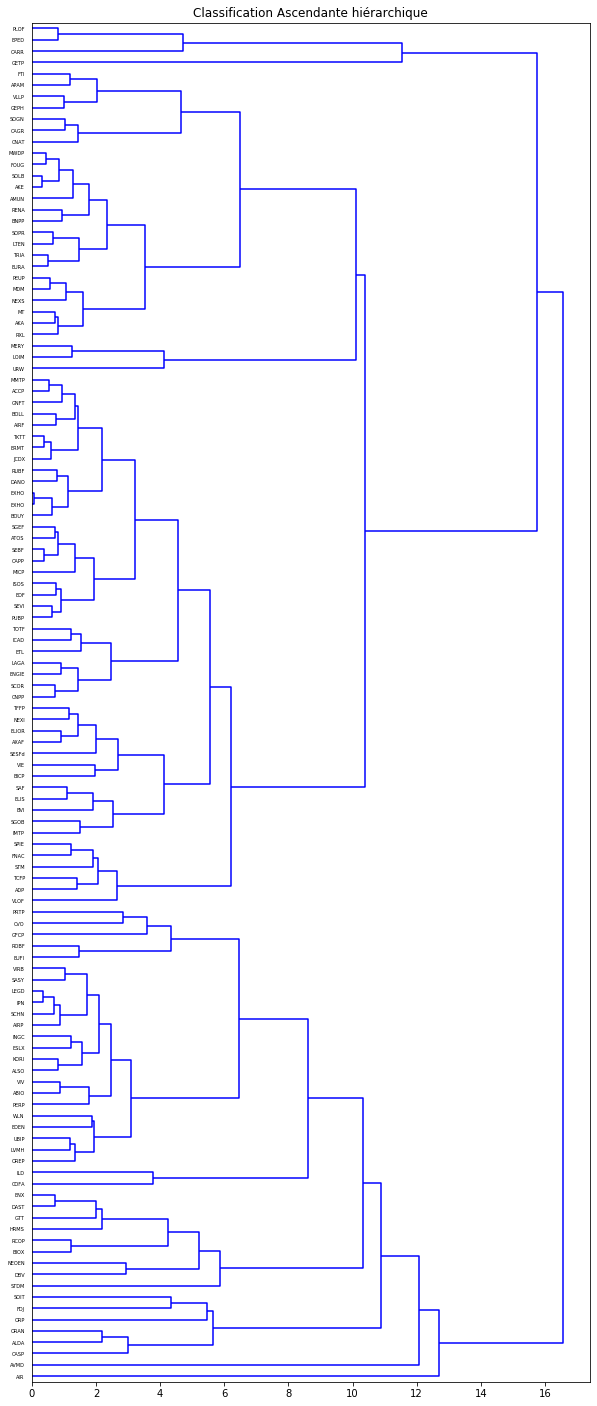

In [49]:
# affichage du dendrogramme
plt.figure(figsize=(10,25))
plt.title("Classification Ascendante hiérarchique")
dendrogram(z,labels=sbf120.index,orientation="right",color_threshold=0)
plt.show()

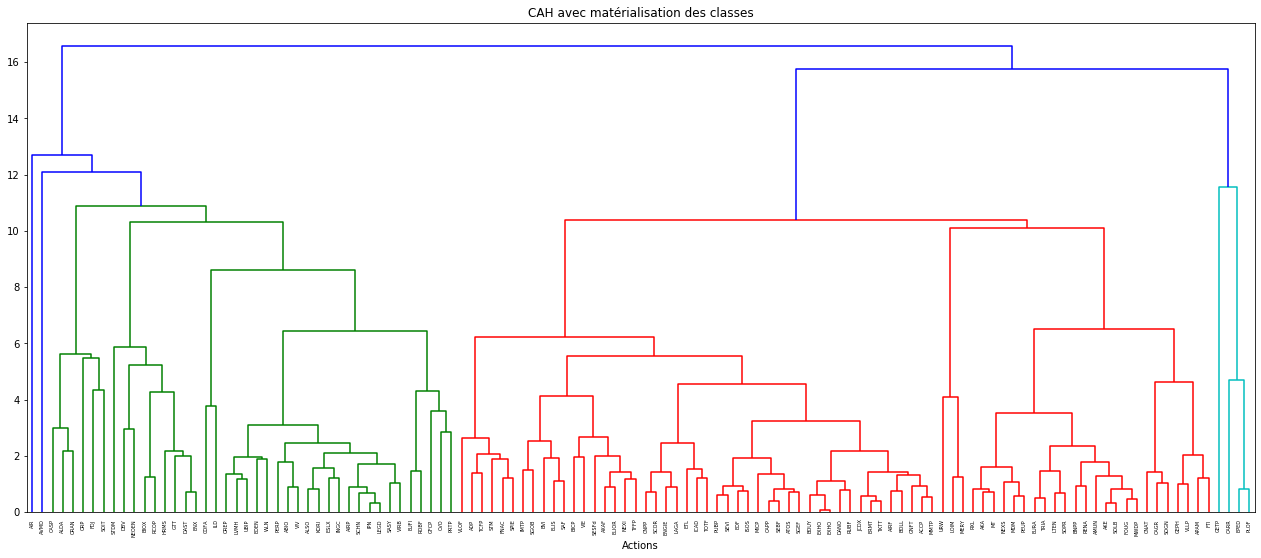

In [54]:
# Matérialisation des 4 classes
plt.figure(figsize=(22,9))
plt.title("CAH avec matérialisation des classes")
plt.xlabel("Actions")
dendrogram(z,labels=sbf120.index)
plt.show()

In [60]:
# Identifiants de groupes obtenus
k=4
sbf120_clus_cah = fcluster(z,k,criterion="maxclust")
sbf120_clus_cah

array([1, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 4, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 4, 3, 1, 3, 1, 3,
       3, 3, 1, 3, 3, 3, 3, 4, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 4, 1, 3, 1, 3,
       1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 1, 1, 3, 3, 1], dtype=int32)

In [57]:
# index triés des groupes
idg = np.argsort(sbf120_clus_cah)

In [58]:
# Affichage des observations et leurs groupes
pd.DataFrame(sbf120.index[idg],sbf120_clus_cah[idg])

,stock
1,ABIO
1,ENX
1,ESLX
1,EUFI
1,FDJ
1,GFCP
1,GTT
1,HRMS
1,ILD
1,IPN


# 4.3. K-means Clustering

In [61]:
# K-means sur les données centrées et réduites
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(sbf120_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
# affichage de l'inertie
kmeans.inertia_

725.3605730396489

In [63]:
# Index triés des groupes
idk=np.argsort(kmeans.labels_)

In [64]:
# Affichage des observations et de leurs groupes
pd.DataFrame(sbf120.index[idk],kmeans.labels_[idk])

,stock
0,EPED
0,GETP
0,CARR
0,PLOF
1,MERY
1,FTI
1,GEPH
1,SOGN
1,COFA
1,CNAT


In [65]:
# Distances aux centres de classes des observations
kmeans.transform(sbf120_cr)

array([[ 5.93206012,  3.6209865 ,  2.49006007,  1.65431092],
       [ 5.76273596,  2.52670887,  3.35775268,  0.66212961],
       [ 6.02587316,  4.2316375 ,  3.724327  ,  2.13191889],
       [11.14280996, 10.14434794,  7.97789514,  9.7410044 ],
       [ 5.98101817,  2.79907606,  3.91787662,  1.06492232],
       [ 5.78248688,  3.16600025,  2.5663859 ,  1.02948695],
       [ 6.22709044,  2.1569077 ,  4.69393062,  2.36499925],
       [ 5.7875278 ,  2.54082454,  3.81737476,  1.02447585],
       [ 7.05670483,  4.10301118,  4.07623106,  3.7779587 ],
       [ 6.20964713,  3.20373655,  3.53771398,  1.67364992],
       [ 5.75604965,  1.79530449,  3.58785818,  1.18140719],
       [ 5.98560661,  1.17516733,  4.4400281 ,  2.11019687],
       [ 5.99012978,  3.24052474,  3.78492101,  0.9829044 ],
       [10.75709905,  8.81837348,  9.38148252,  8.56951592],
       [ 5.62510431,  2.7787867 ,  4.22088182,  1.57168156],
       [ 6.11752548,  3.79677699,  3.88497054,  2.09622467],
       [ 6.69280153,  5.

<h2> Correspondace des classes CAH vs Kmeans</h2>

In [66]:
pd.crosstab(sbf120_clus_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,2,14,25
2,0,0,1,0
3,0,12,0,62
4,4,0,0,0


K-MEANS, à la différence de la CAH, ne fournit pas d’outils d’aide à la détection du nombre de classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés. Le schéma est souvent le même : on fait varier le nombre de groupes et on surveille l’évolution d’un indicateur de qualité de la solution c.-à-d. l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus des autres groupes.

Dans ce qui suit, on calcule la métrique « silhouette » pour différents nombres de groupes issus de la méthode des centres mobiles.

<h3>4.3.2. Utilisation de la métrique "silhouette"</h3>

In [67]:
# faire varier le nombre de clusters de 2 à 10
sbf_res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(sbf120_cr)
    sbf_res[k] = metrics.silhouette_score(sbf120_cr,km.labels_)

print(sbf_res)

[0.31583146 0.29144085 0.19053074 0.31404384 0.27096256 0.24450069
 0.30166765 0.25053089 0.15479061]


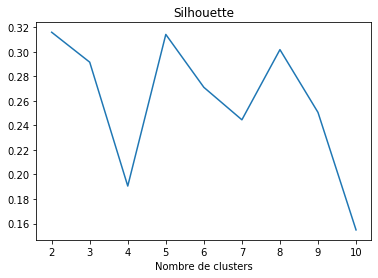

In [68]:
# graphique
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(np.arange(2,11,1),sbf_res)
plt.show()

La silhouette vient de confirmer notre choix de k=4

# Interprétation des classes

<h2>Analyses univariées et multivariées</h2>

L’idée est de comparer les moyennes des variables actives conditionnellement aux groupes. Il est possible de quantifier globalement l’amplitude des écarts avec la proportion de variance expliquée (carré du rapport de corrélation). La démarche peut être étendue aux variables illustratives. Pour les catégorielles, nous confronterions les distributions conditionnelles. 
<br>
L’approche est simple et les résultats faciles à lire. Rappelons cependant que nous ne tenons pas compte des liaisons entre les variables dans ce cas.

In [69]:
# moyenne par variable
m = sbf120.mean()
m

book_to_market        38.183833
price_to_earnings     37.431000
g                      0.041500
price_to_cash_flow    54.072500
dividend_yield         0.037118
beta                   1.093833
price_to_book          2.839000
price_to_sales         2.325167
payout_ratio           0.574607
dtype: float64

In [70]:
# TSS
TSS = sbf120.shape[0]*sbf120.var(ddof=0)
print(TSS)

book_to_market        378762.155437
price_to_earnings     660855.043680
g                          4.280083
price_to_cash_flow    957815.489850
dividend_yield             0.131776
beta                      26.674837
price_to_book           2626.096480
price_to_sales          1255.179197
payout_ratio              76.284486
dtype: float64


In [71]:
# Dataframe conditionnellement aux groupes des K-means
gb = sbf120.groupby(kmeans.labels_)

In [73]:
# effectifs conditionnelles 
nk = gb.size()
nk

0     4
1    14
2    15
3    87
dtype: int64

In [74]:
# moyennes conditionnelles
mk = gb.mean()
mk

,book_to_market,price_to_earnings,g,price_to_cash_flow,dividend_yield,beta,price_to_book,price_to_sales,payout_ratio
0,13.000000,407.415000,-0.003900,28.632500,0.019200,1.392500,2.285000,2.010000,2.195700
1,39.472143,10.285000,0.237457,28.058571,0.093293,1.612143,0.501429,0.805714,0.473686
2,32.902000,51.745333,0.015980,181.612000,0.024093,0.863333,10.154667,8.615333,0.457727
3,40.045057,22.320575,0.016454,37.438736,0.031147,1.036437,1.979310,1.499655,0.536466


In [75]:
# Pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2

In [76]:
# Pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

In [77]:
# Somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
BSS

book_to_market          3279.986186
price_to_earnings     580807.088385
g                          0.610178
price_to_cash_flow    280129.122203
dividend_yield             0.051109
beta                       5.201397
price_to_book            944.810477
price_to_sales           685.500391
payout_ratio              10.985842
dtype: float64


In [78]:
# Carré du rapport de corrélation
# variance expliquée par l'appartenance aux groupes
# pour chaque variable
R2 = BSS/TSS
R2

book_to_market        0.008660
price_to_earnings     0.878872
g                     0.142562
price_to_cash_flow    0.292467
dividend_yield        0.387849
beta                  0.194993
price_to_book         0.359778
price_to_sales        0.546137
payout_ratio          0.144011
dtype: float64

<b>Commentaire de l'analyse univariée et multivariée</b>


<br>


<br>

# 4.4. Analyse du clustering par les kmeans grâce à l'Ananalyse en Composantes Principales

In [79]:
# PCA sur les données centrées et réduites
acp = PCA(n_components=2).fit_transform(sbf120_cr)

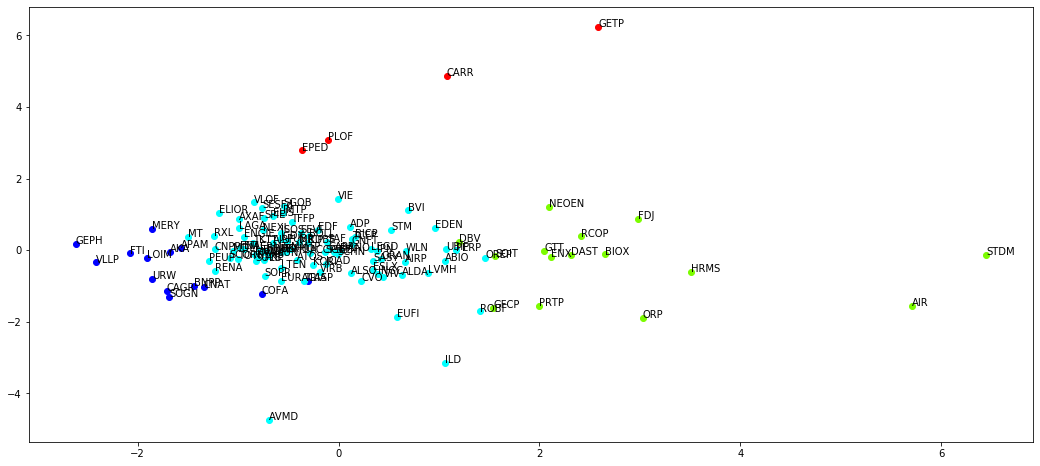

In [84]:
# Projection dans le plan factoriel avec un code couleur selon le cluster et le label des points
plt.figure(figsize=(18,8))
for couleur,k in zip(["red","blue","lawngreen","aqua"],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)

for i,label in enumerate(sbf120.index):
    plt.annotate(label,(acp[i,0],acp[i,1]))

plt.show()

<b>Commentaire de l'ACP</b>


<br>


<br>

<br>


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


<br>

# 5. Clustering avec les critères de Fama & French (1998)

Dans leur article <i><b>Value Versus Growth: The International Evidence</b></i> paru dans le <i> Journal of finance</i> de 1998, Eugene Fama et Kenneth French ont choisi quatres ratios comme critères d'identification des valeurs de rendement des valeurs de croissance. 
<br>Les quatres ratios sont :
<ul>
    <li>Book-to-Market</li>
    <li>Price-to-Earning</li>
    <li>Price-to-Cash-Flow</li>
    <li>Et le Price-to-Dividend (encore appelé Dividend Yiel</li>
</ul>

Nous constituerons un nouveau DataFrame <b>"sbf120ff"</b> avec les critères de Fama & French. Soit une DataFrame de quatre variables actives.

<h2>5.1. Constitution de sbf120ff et analyse exploratoire</h2>

In [86]:
sbf120ff = sbf_120[["book_to_market","price_to_earnings","price_to_cash_flow","dividend_yield"]]
sbf120ff

,book_to_market,price_to_earnings,price_to_cash_flow,dividend_yield
stock,,,,
ABIO,13.24,29.13,134.25,0.01540
ACCP,18.04,18.43,24.49,0.02640
ADP,44.06,20.55,46.43,0.00820
AIR,1.69,24.75,417.32,0.02090
AIRF,-5.99,4.29,3.00,0.02645
AIRP,38.82,25.38,73.15,0.01910
AKA,21.87,5.04,3.21,0.03860
AKE,72.59,18.34,16.47,0.02280
ALDA,9.63,7.54,351.68,0.07030


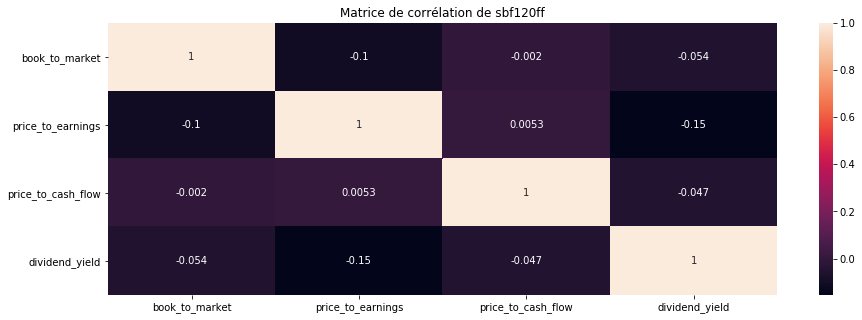

In [88]:
plt.figure(figsize= (15,5))
plt.title("Matrice de corrélation de sbf120ff")
sns.heatmap(sbf120ff.corr(), annot=True)

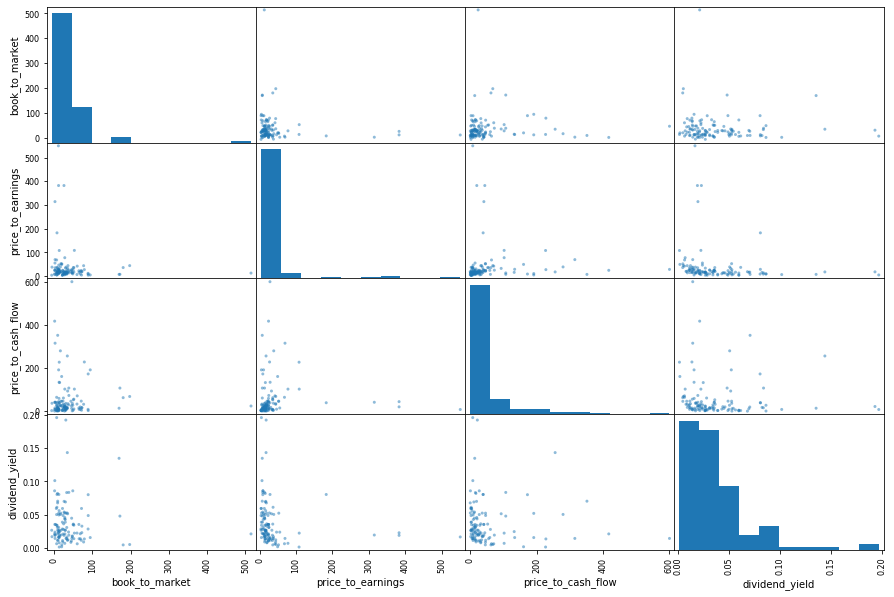

In [89]:
# graphique de croisement des variables deux à deux
scatter_matrix(sbf120ff,figsize=(15,10))
plt.show()

Nous constatons une absence d'indépendance entre nos variables.

<h2>5.2. Centrage et réduction des données sbf120ff</h2>

In [107]:
# Centrage et réduction des données
sbf120ff_cr = preprocessing.scale(sbf120ff)

<h2>5.3. Classification Ascendande hiérarchique</h2>

In [108]:
# Génération de la matrice des liens
z_ff = linkage(sbf120ff_cr,method='ward',metric='euclidean')

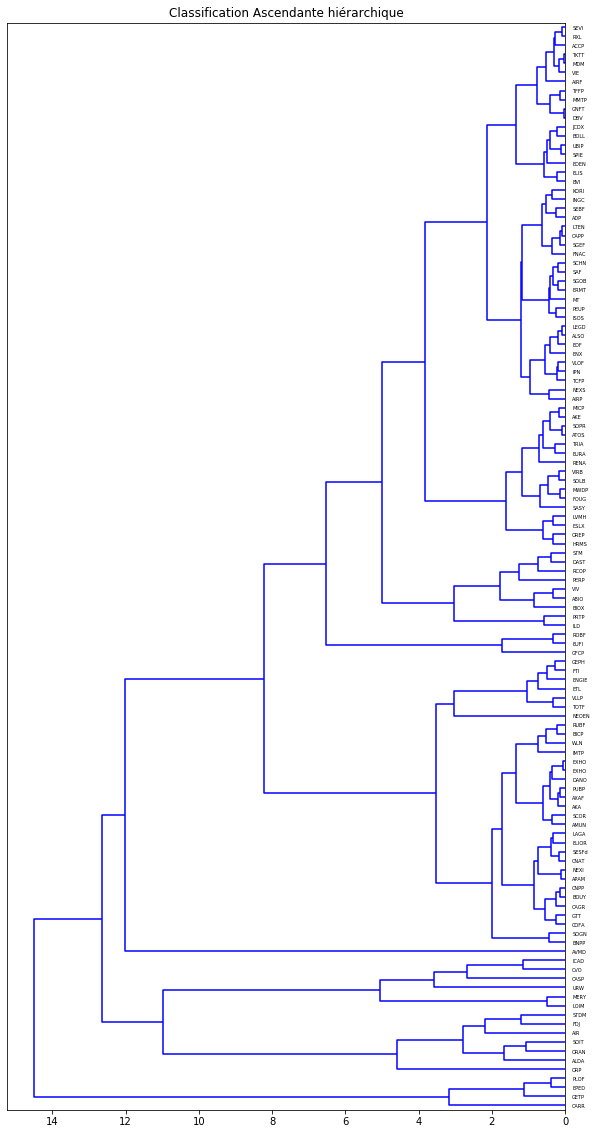

In [111]:
# affichage du dendrogramme
plt.figure(figsize=(10,20))
plt.title("Classification Ascendante hiérarchique")
dendrogram(z_ff,labels=sbf120ff.index,orientation="left",color_threshold=0)
plt.show()

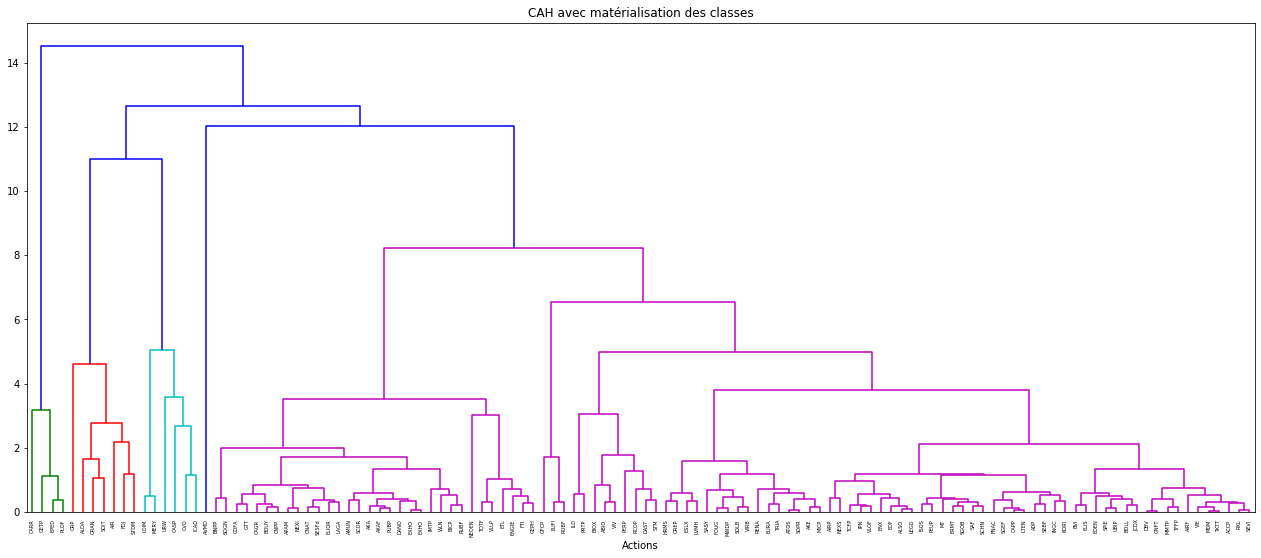

In [112]:
# Matérialisation des 4 classes
plt.figure(figsize=(22,9))
plt.title("CAH avec matérialisation des classes")
plt.xlabel("Actions")
dendrogram(z_ff,labels=sbf120.index)
plt.show()

In [113]:
# Identifiants de groupes obtenus
k=4
sbf120ff_cah = fcluster(z_ff,k,criterion="maxclust")
sbf120ff_cah

array([3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3], dtype=int32)

In [114]:
# index triés des groupes
idgff = np.argsort(sbf120ff_cah)

In [115]:
# Affichage des observations et leurs groupes
pd.DataFrame(sbf120ff.index[idgff],sbf120ff_cah[idgff])

,stock
1,PLOF
1,EPED
1,CARR
1,GETP
2,SOIT
2,CASP
2,ORP
2,STDM
2,CVO
2,ORAN


# 5.4. K-means Clustering compte tenu du critère de fama & french

In [117]:
# K-means sur les données centrées et réduites
kmeans_ff = cluster.KMeans(n_clusters=4)
kmeans_ff.fit(sbf120ff_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [118]:
# affichage de l'inertie
kmeans_ff.inertia_

215.06351512583086

In [119]:
# Index triés des groupes
idkff=np.argsort(kmeans_ff.labels_)

# Affichage des observations et de leurs groupes
pd.DataFrame(sbf120ff.index[idkff],kmeans_ff.labels_[idkff])

,stock
0,ABIO
0,RCOP
0,PUBP
0,PEUP
0,PERP
0,OREP
0,NEXS
0,NEXI
0,NEOEN
0,MWDP


In [121]:
# Distances aux centres de classes des observations
kmeans_ff.transform(sbf120ff_cr)

array([[ 1.41451504,  5.23403908,  1.85849558,  9.00904836],
       [ 0.46165165,  5.24715139,  2.94059398,  8.83697684],
       [ 0.92659585,  5.25661879,  2.82025825,  8.38498424],
       [ 4.41879831,  6.74986071,  1.72013339, 10.13190105],
       [ 0.89227923,  5.45467081,  3.26327756,  9.26821786],
       [ 0.75279637,  5.19246382,  2.42996336,  8.48462015],
       [ 0.44706596,  5.46332571,  3.16041871,  8.78708252],
       [ 0.82189911,  5.35194039,  3.10281619,  7.86518851],
       [ 3.77998285,  6.67017913,  1.3315004 ,  9.81713613],
       [ 0.66639034,  5.1810868 ,  2.97024537,  8.89963576],
       [ 0.36069629,  5.39191004,  3.03600822,  8.3684595 ],
       [ 0.99674133,  5.48245128,  3.09542075,  8.81353338],
       [ 0.94085   ,  5.36431281,  3.21864304,  7.99447182],
       [ 8.55136058, 10.38691772,  9.03045698,  0.        ],
       [ 0.33185284,  5.41211548,  3.07258776,  8.65934237],
       [ 0.46013039,  5.33326143,  2.78661439,  8.66081233],
       [ 1.89111343,  5.

<h2>Correspondance des classes </h2>

In [122]:
pd.crosstab(sbf120ff_cah,kmeans_ff.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,4,0,0
2,4,0,9,0
3,99,0,3,0
4,0,0,0,1


<h2>5.5. ACP sur les deux labels CAH et Kmeans pour l'aide à l'interprétation</h2>

In [123]:
# PCA sur les données centrées et réduites
acp_ff = PCA(n_components=2).fit_transform(sbf120ff_cr)

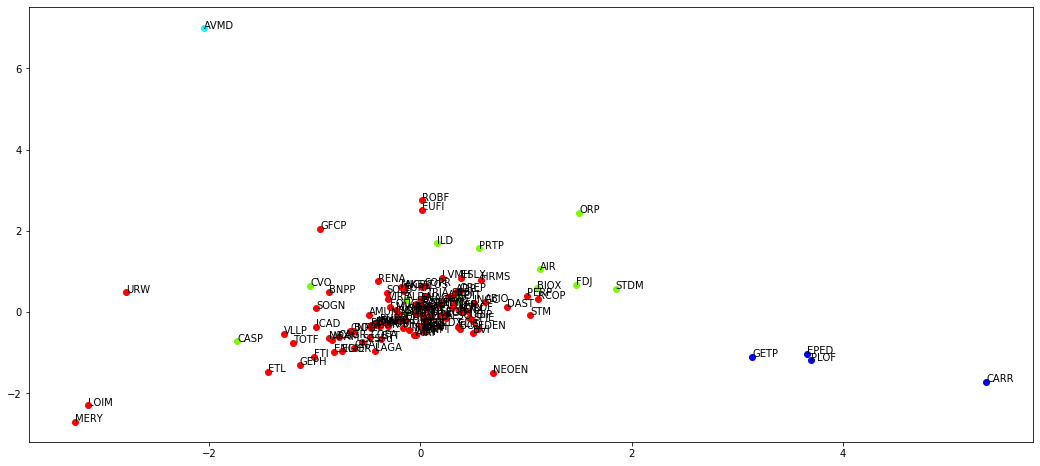

In [127]:
# Projection dans le plan factoriel avec un code couleur selon le cluster et le label des points
plt.figure(figsize=(18,8))
for couleur,k in zip(["red","blue","lawngreen","aqua"],[0,1,2,3]):
    plt.scatter(acp_ff[kmeans_ff.labels_==k,0],acp_ff[kmeans_ff.labels_==k,1],c=couleur)

for i,label in enumerate(sbf120ff.index):
    plt.annotate(label,(acp_ff[i,0],acp_ff[i,1]))

plt.show()<

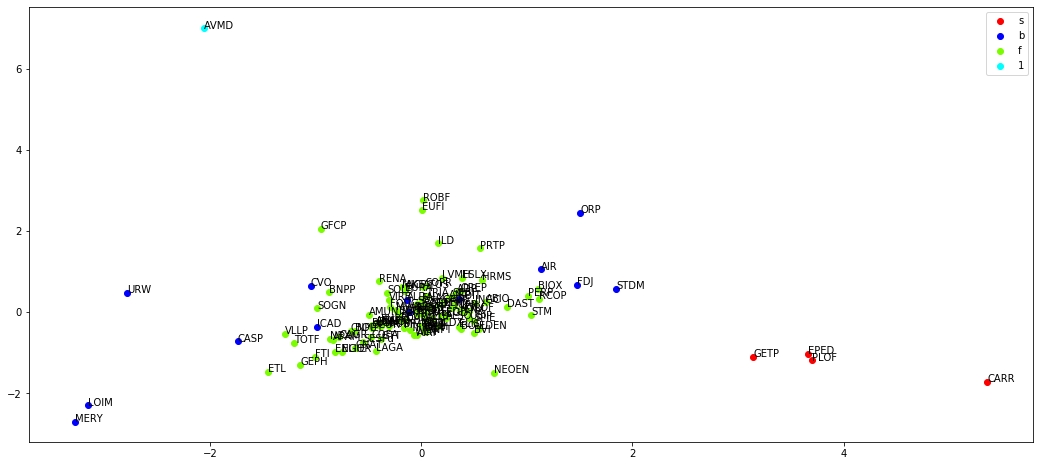

In [126]:
# Projection dans le plan factoriel avec un code couleur selon le cluster et le label des points
plt.figure(figsize=(18,8))
for couleur,k in zip(["red","blue","lawngreen","aqua"],[1,2,3,4]):
    plt.scatter(acp_ff[sbf120ff_cah==k,0],acp_ff[sbf120ff_cah==k,1],c=couleur)

for i,label in enumerate(sbf120ff.index):
    plt.annotate(label,(acp_ff[i,0],acp_ff[i,1]))

plt.legend("sbf120ff_cah")
plt.show()

In [129]:
centroids_ff = pd.DataFrame(kmeans_ff.cluster_centers_, 
                         columns = ["book_to_market","price_to_earnings","price_to_cash_flow","dividend_yield"])

In [130]:
centroids_ff.index_name = "N°_de_cluster"

In [132]:
centroids_ff["N°_de_cluster"] = centroids_ff.index
centroids_ff = centroids_ff.reset_index(drop=True)
centroids_ff

,book_to_market,price_to_earnings,price_to_cash_flow,dividend_yield,N°_de_cluster
0,-0.058451,-0.183867,-0.283870,0.016611,0
1,-0.448259,4.985635,-0.284752,-0.540692,1
2,-0.055261,-0.056385,2.559168,0.078434,2
3,8.476578,-0.327597,-0.332351,-0.489392,3


<br>



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



<br>

# 6. Clustering selon les critères de Berdot, Léonard et Nivoix (2006)

En 2006, Berdot, Léonard et Nivoix ont résumé l'ensemble de distinction de la typologie des actions par trois ratios qu'ils estimaient regroupé l'ensemble des autres ratios : 
<ul>
    <li>Price-to-Earning</li>
    <li>Price-to-book</li>
    <li>Dividend-yield</li>
</ul>
Nous utiliserons les mêmes critères dans cette partie. Nous allons nommer la base de données <b>sbf120bln</b> pour y intégrer le nom des auteurs.

In [135]:
sbf120bln = sbf_120[["price_to_earnings","dividend_yield","price_to_book"]]
sbf120bln.head()

,price_to_earnings,dividend_yield,price_to_book
stock,,,
ABIO,29.13,0.01540,3.44
ACCP,18.43,0.02640,1.37
ADP,20.55,0.00820,1.95
AIR,24.75,0.02090,41.96
AIRF,4.29,0.02645,1.51


In [137]:
sbf120bln.shape

(120, 3)

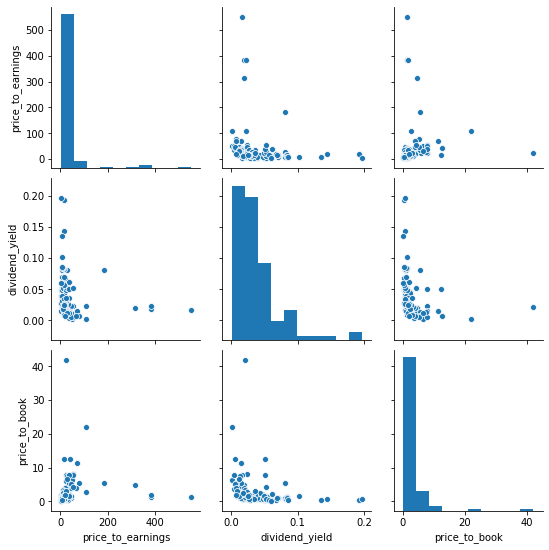

In [138]:
sns.pairplot(sbf120bln)

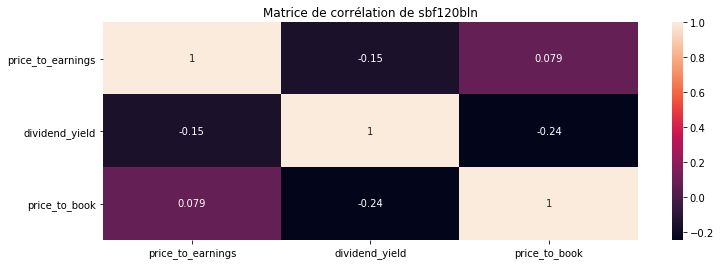

In [139]:
plt.figure(figsize= (12,4))
plt.title("Matrice de corrélation de sbf120bln")
sns.heatmap(sbf120bln.corr(), annot=True)

Absence d'interdépendance entre nos variables. Très bonne nouvelle pour la suite.

<h2>6.1. Centrage et réduction des données sbf120bln</h2>

In [141]:
# Centrage et réduction des données
sbf120bln_cr = preprocessing.scale(sbf120bln)

# 6.2. Classification Ascendande hiérarchique

In [142]:
# Génération de la matrice des liens
z_bln = linkage(sbf120bln_cr,method='ward',metric='euclidean')

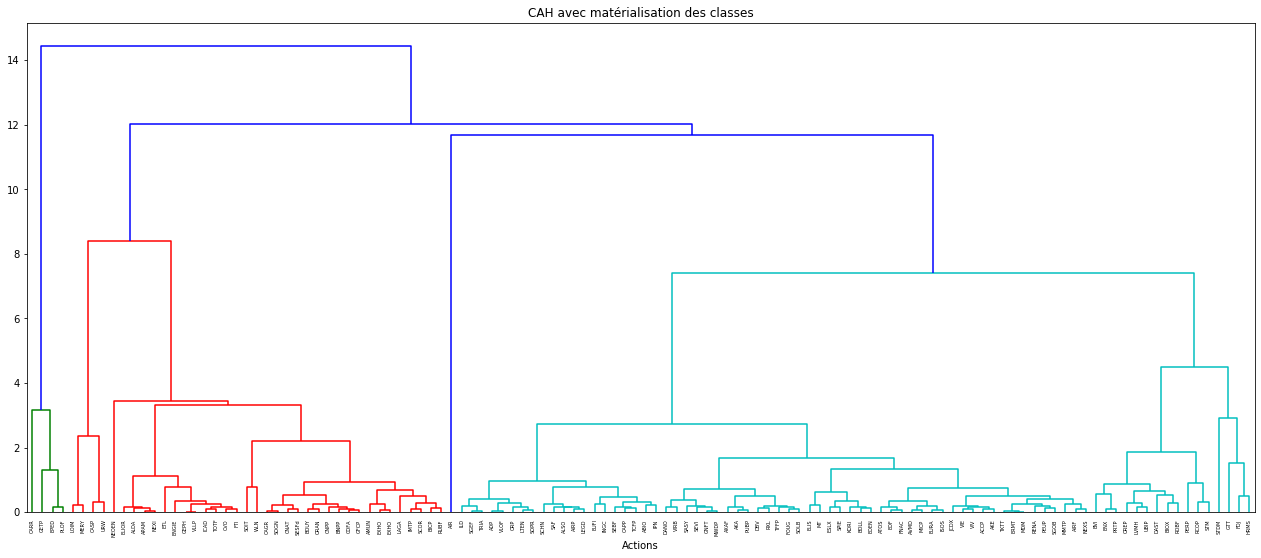

In [143]:
# Matérialisation des 4 classes
plt.figure(figsize=(22,9))
plt.title("CAH avec matérialisation des classes")
plt.xlabel("Actions")
dendrogram(z_bln,labels=sbf120bln.index)
plt.show()

In [146]:
# Identifiants de groupes obtenus
k=4
sbf120bln_cah = fcluster(z_bln,k,criterion="maxclust")
sbf120bln_cah

array([3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 2, 3, 3,
       2, 2, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 2, 3, 2], dtype=int32)

In [147]:
# Nombre de clusters constitués 
print(np.unique(sbf120bln_cah).size, "groupes constitués")

4 groupes constitués


Parfait, nous obtenons 4 groupes constitués comme souhaité.

In [154]:
# index triés des groupes
idgbln = np.argsort(sbf120bln_cah)

In [172]:
# Affichage des observations et leurs groupes
pd.DataFrame(sbf120bln.index[idgbln],sbf120bln_cah[idgbln])

,stock
1,CARR
1,PLOF
1,EPED
1,GETP
2,WLN
2,SOIT
2,SOGN
2,ELIOR
2,NEOEN
2,SESFd


In [185]:
sbf120bln.groupby([sbf120bln_cah]).count()

,price_to_earnings,dividend_yield,price_to_book
1,4,4,4
2,37,37,37
3,78,78,78
4,1,1,1


# 6.3. K-means Clustering compte tenu du critère de Berdot et all

In [188]:
# K-means sur les données centrées et réduites
kmeans_bln = cluster.KMeans(n_clusters=4)
kmeans_bln.fit(sbf120bln_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [189]:
# affichage de l'inertie
kmeans_bln.inertia_

103.11039254678899

In [190]:
# Index triés des groupes
idkbln=np.argsort(kmeans_bln.labels_)

# Affichage des observations et de leurs groupes
pd.DataFrame(sbf120bln.index[idkbln],kmeans_bln.labels_[idkbln])

,stock
0,ABIO
0,PUBP
0,PRTP
0,PEUP
0,PERP
0,ORP
0,OREP
0,ORAN
0,NEXS
0,MWDP


In [193]:
print("Nombre de valeur mobilière de placement par cluster")
sbf120bln.groupby([kmeans_bln.labels_]).count()

Nombre de valeur mobilière de placement par cluster


,price_to_earnings,dividend_yield,price_to_book
0,97,97,97
1,2,2,2
2,17,17,17
3,4,4,4


In [192]:
# Distances aux centres de classes des observations
kmeans_bln.transform(sbf120bln_cr)

array([[0.40924219, 6.11779152, 2.61868293, 5.10475692],
       [0.27050056, 6.58652095, 2.23655394, 5.24982449],
       [0.59357338, 6.44448153, 2.79080481, 5.22415925],
       [8.42074213, 2.23184734, 9.07175254, 9.92579189],
       [0.35189765, 6.57851225, 2.24970197, 5.43914622],
       [0.33477658, 6.08519208, 2.5168797 , 5.1560486 ],
       [0.57862958, 6.77327663, 1.88321369, 5.46348765],
       [0.30906377, 6.5883643 , 2.3448826 , 5.24798867],
       [1.36301304, 6.91514586, 0.93400871, 5.61220779],
       [0.27270246, 6.19257963, 2.49273591, 5.18412773],
       [0.60104891, 6.66033492, 1.69108627, 5.36083889],
       [1.33797653, 6.89485045, 0.92239244, 5.48381142],
       [0.53153498, 6.6313344 , 2.62258511, 5.28360956],
       [0.33337926, 6.55462407, 2.40641987, 5.31606178],
       [0.65655833, 6.81691982, 1.75714819, 5.41244505],
       [0.79019772, 6.65464827, 1.45749236, 5.32553952],
       [1.181644  , 5.47286221, 3.21930434, 4.92931865],
       [0.83723291, 6.89138341,

In [199]:
# Correspondance des classes CAH vs Kmeans
pd.crosstab(sbf120bln_cah,kmeans_bln.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,0,4
2,20,0,17,0
3,77,1,0,0
4,0,1,0,0


ValueError: 'c' argument has 120 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

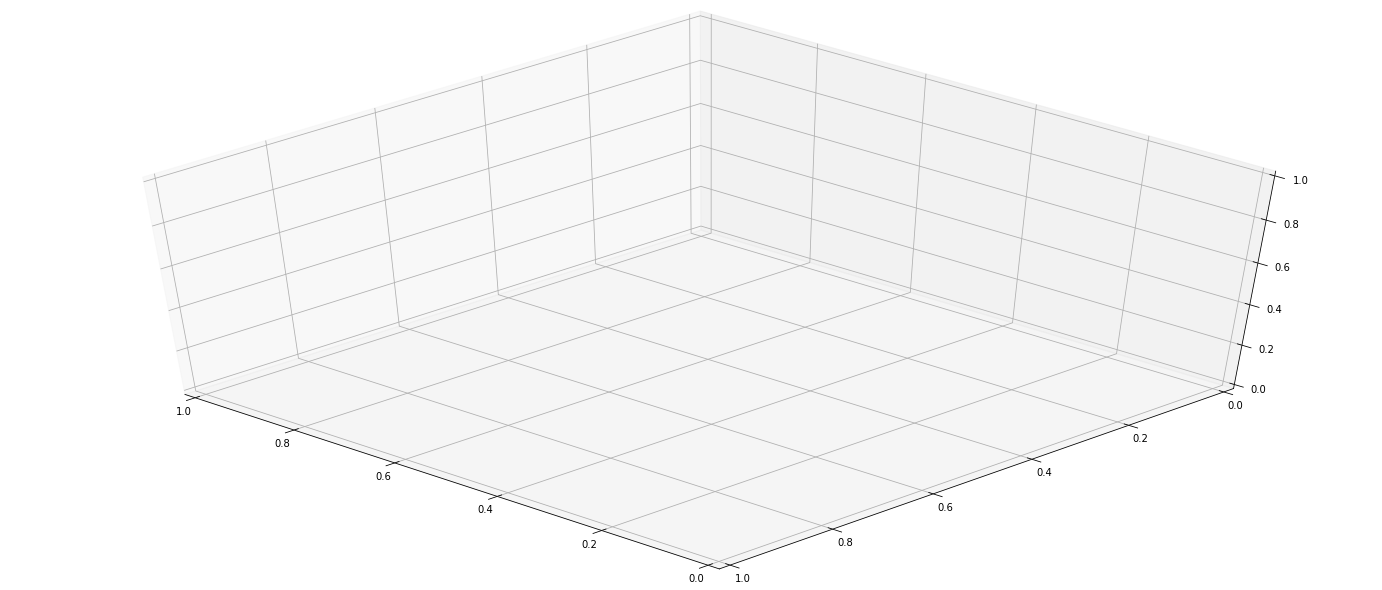

In [206]:

fig = plt.figure(1, figsize=(20, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = kmeans_bln.labels_

ax.scatter(sbf120bln_cr[kmeans_ff.labels_==k,0], sbf120bln_cr[kmeans_ff.labels_==k,1], 
           sbf120bln_cr[kmeans_ff.labels_==k,2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('price_to_earnings')
ax.set_ylabel('dividend_yield')
ax.set_zlabel('price_to_book')

plt.show()

In [ ]:
# Projection dans le plan factoriel avec un code couleur selon le cluster et le label des points

price_to_earnings	dividend_yield	price_to_book


plt.figure(figsize=(18,8))
for couleur,k in zip(["red","blue","lawngreen","aqua"],[0,1,2,3]):
    plt.scatter(acp_ff[kmeans_ff.labels_==k,0],acp_ff[kmeans_ff.labels_==k,1],c=couleur)

for i,label in enumerate(sbf120ff.index):
    plt.annotate(label,(acp_ff[i,0],acp_ff[i,1]))

plt.show()<